# 🏡 King County House Price - Comprehensive EDA & Feature Engineering

**Author:** Data Science Research  
**Date:** 2026-01-09  
**Objective:** Phân tích khám phá dữ liệu (EDA) toàn diện và xây dựng pipeline để dự đoán giá nhà

---

## 📋 Table of Contents

1. [Setup & Data Loading](#1-setup--data-loading)
2. [Overview - Hiểu Tổng Quan Dữ Liệu](#2-overview---hiểu-tổng-quan-dữ-liệu)
3. [Data Quality Assessment](#3-data-quality-assessment)
4. [Univariate Analysis](#4-univariate-analysis)
5. [Bivariate Analysis](#5-bivariate-analysis)
6. [Multivariate Analysis](#6-multivariate-analysis)
7. [Feature Engineering](#7-feature-engineering)
8. [Data Cleaning & Preprocessing](#8-data-cleaning--preprocessing)
9. [Modeling Preparation](#9-modeling-preparation)
10. [Summary & Next Steps](#10-summary--next-steps)

---

## 1. Setup & Data Loading

### 1.1 Import Libraries

**Mục đích:** Import tất cả libraries cần thiết cho EDA và modeling

In [16]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import normaltest, skew, kurtosis
from scipy.stats.mstats import winsorize

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Utilities
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 4)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


### 1.2 Load Dataset

**Mục đích:** Load dữ liệu và xem quick overview

In [17]:
# Load data
df = pd.read_csv('kc_house_data.csv')

print(f"📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n✅ Data loaded successfully!")

📊 Dataset Shape: 21,613 rows × 21 columns
💾 Memory Usage: 4.62 MB

✅ Data loaded successfully!


In [18]:
# First look at the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
# Last rows
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


---

## 2. Overview - Hiểu Tổng Quan Dữ Liệu

### 2.1 Dataset Information

**Mục đích:** 
- Xem cấu trúc dataset
- Kiểm tra data types
- Phát hiện missing values

**Tại sao quan trọng:**
- Data types sai → model không train được
- Missing values → cần xử lý trước khi modeling

In [20]:
# Detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [21]:
# Create comprehensive overview
overview_df = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null_Count': [df[col].count() for col in df.columns],
    'Null_Count': df.isnull().sum().values,
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).values.round(2),
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Unique_Ratio_%': [(df[col].nunique() / len(df) * 100) for col in df.columns]
})

overview_df = overview_df.round(2)
overview_df.style.background_gradient(subset=['Null_Percentage', 'Unique_Ratio_%'], cmap='Reds')

,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values,Unique_Ratio_%
0,id,int64,21613,0,0.000000,21436,99.180000
1,date,object,21613,0,0.000000,372,1.720000
2,price,float64,21613,0,0.000000,4028,18.640000
3,bedrooms,int64,21613,0,0.000000,13,0.060000
4,bathrooms,float64,21613,0,0.000000,30,0.140000
5,sqft_living,int64,21613,0,0.000000,1038,4.800000
6,sqft_lot,int64,21613,0,0.000000,9782,45.260000
7,floors,float64,21613,0,0.000000,6,0.030000
8,waterfront,int64,21613,0,0.000000,2,0.010000
9,view,int64,21613,0,0.000000,5,0.020000


### 2.2 Statistical Summary

**Mục đích:** Xem phân phối và range của các biến số

In [22]:
# Numeric features summary
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
id,21613.000000,4580301520.864988,2876565571.312057,1000102.000000,2123049194.000000,3904930410.000000,7308900445.000000,9900000190.000000
price,21613.000000,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21613.000000,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21613.000000,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,21613.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21613.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
floors,21613.000000,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21613.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
view,21613.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21613.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000


In [23]:
# Categorical/Low cardinality features
categorical_cols = []
for col in df.columns:
    if df[col].nunique() < 20 and col not in ['id', 'date']:
        categorical_cols.append(col)

print(f"📊 Categorical/Discrete features: {categorical_cols}")
print(f"\nTotal: {len(categorical_cols)} features")

📊 Categorical/Discrete features: ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

Total: 6 features


---

## 3. Data Quality Assessment

### 3.1 Missing Values Analysis

**Tại sao quan trọng:**
- Missing values > 30% → xem xét loại bỏ cột
- Missing values < 5% → có thể impute hoặc loại bỏ rows
- Missing values 5-30% → cần phân tích pattern (MAR, MCAR, MNAR)

In [24]:
# Check missing values
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Percentage', ascending=False)

missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    print("⚠️ Columns with missing values:")
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df['Column'], missing_df['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.show()
else:
    print("✅ NO MISSING VALUES! Dataset is complete.")

✅ NO MISSING VALUES! Dataset is complete.


### 3.2 Duplicate Analysis

**Tại sao quan trọng:**
- Duplicates gây overfitting
- Trong house price data, duplicate IDs có thể là nhà bán lại

In [25]:
# Check duplicates
duplicate_rows = df.duplicated().sum()
duplicate_ids = df['id'].duplicated().sum()

print(f"📊 Duplicate Analysis:")
print(f"   - Complete duplicate rows: {duplicate_rows}")
print(f"   - Duplicate IDs: {duplicate_ids}")

if duplicate_ids > 0:
    print(f"\n⚠️ {duplicate_ids} houses appear multiple times (possibly resold)")
    
    # Show examples
    dup_ids = df[df['id'].duplicated(keep=False)]['id'].unique()[:5]
    print(f"\nExample of duplicate IDs (first 5):")
    for dup_id in dup_ids:
        print(f"\nID: {dup_id}")
        display(df[df['id'] == dup_id][['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living']])

📊 Duplicate Analysis:
   - Complete duplicate rows: 0
   - Duplicate IDs: 177

⚠️ 177 houses appear multiple times (possibly resold)

Example of duplicate IDs (first 5):

ID: 6021501535


,id,date,price,bedrooms,bathrooms,sqft_living
93,6021501535,20140725T000000,430000.0,3,1.5,1580
94,6021501535,20141223T000000,700000.0,3,1.5,1580



ID: 4139480200


,id,date,price,bedrooms,bathrooms,sqft_living
313,4139480200,20140618T000000,1384000.0,4,3.25,4290
314,4139480200,20141209T000000,1400000.0,4,3.25,4290



ID: 7520000520


,id,date,price,bedrooms,bathrooms,sqft_living
324,7520000520,20140905T000000,232000.0,2,1.0,1240
325,7520000520,20150311T000000,240500.0,2,1.0,1240



ID: 3969300030


,id,date,price,bedrooms,bathrooms,sqft_living
345,3969300030,20140723T000000,165000.0,4,1.0,1000
346,3969300030,20141229T000000,239900.0,4,1.0,1000



ID: 2231500030


,id,date,price,bedrooms,bathrooms,sqft_living
371,2231500030,20141001T000000,315000.0,4,2.25,2180
372,2231500030,20150324T000000,530000.0,4,2.25,2180


### 3.3 Data Anomalies Detection

**Tại sao quan trọng:**
- Nhà có 0 bedrooms/bathrooms → không hợp lý
- Giá trị âm → lỗi dữ liệu
- Giá trị 33 bedrooms → outlier cực đoan

In [26]:
# Check for anomalies
print("🔍 Checking for Data Anomalies:\n")

anomalies = {}

# Check for zero values in important columns
if 'bedrooms' in df.columns:
    zero_bedrooms = (df['bedrooms'] == 0).sum()
    if zero_bedrooms > 0:
        anomalies['Zero Bedrooms'] = zero_bedrooms
        print(f"⚠️ {zero_bedrooms} houses with 0 bedrooms")

if 'bathrooms' in df.columns:
    zero_bathrooms = (df['bathrooms'] == 0).sum()
    if zero_bathrooms > 0:
        anomalies['Zero Bathrooms'] = zero_bathrooms
        print(f"⚠️ {zero_bathrooms} houses with 0 bathrooms")

if 'sqft_living' in df.columns:
    zero_sqft = (df['sqft_living'] == 0).sum()
    if zero_sqft > 0:
        anomalies['Zero Sqft Living'] = zero_sqft
        print(f"⚠️ {zero_sqft} houses with 0 sqft_living")

# Check for extreme values
if 'bedrooms' in df.columns:
    max_bedrooms = df['bedrooms'].max()
    if max_bedrooms > 15:
        extreme_bedrooms = (df['bedrooms'] > 15).sum()
        anomalies['Extreme Bedrooms'] = extreme_bedrooms
        print(f"⚠️ {extreme_bedrooms} houses with > 15 bedrooms (max: {max_bedrooms})")

# Check for negative prices
if 'price' in df.columns:
    negative_prices = (df['price'] < 0).sum()
    if negative_prices > 0:
        anomalies['Negative Prices'] = negative_prices
        print(f"⚠️ {negative_prices} houses with negative prices")

if len(anomalies) == 0:
    print("✅ No obvious anomalies detected!")
else:
    print(f"\n📊 Total anomalies found: {sum(anomalies.values())}")

🔍 Checking for Data Anomalies:

⚠️ 13 houses with 0 bedrooms
⚠️ 10 houses with 0 bathrooms
⚠️ 1 houses with > 15 bedrooms (max: 33)

📊 Total anomalies found: 24


---

## 4. Univariate Analysis

### 4.1 Target Variable Analysis (Price)

**Tại sao quan trọng:**
- Hiểu phân phối của target variable
- Skewness cao → cần log transform
- Outliers → cần xử lý để model không bị bias

In [27]:
# Price statistics
print("📊 PRICE STATISTICS")
print("="*50)
print(df['price'].describe())
print(f"\n📈 Skewness: {df['price'].skew():.4f}")
print(f"📈 Kurtosis: {df['price'].kurtosis():.4f}")
print(f"\n💰 Range: ${df['price'].min():,.0f} - ${df['price'].max():,.0f}")
print(f"💰 IQR: ${df['price'].quantile(0.75) - df['price'].quantile(0.25):,.0f}")

# Interpretation
print("\n🔍 INTERPRETATION:")
if df['price'].skew() > 1:
    print("   ⚠️ Highly right-skewed → Log transformation recommended")
if df['price'].kurtosis() > 3:
    print("   ⚠️ Heavy tails → Many outliers present")

📊 PRICE STATISTICS
count    2.1613e+04
mean     5.4009e+05
std      3.6713e+05
min      7.5000e+04
25%      3.2195e+05
50%      4.5000e+05
75%      6.4500e+05
max      7.7000e+06
Name: price, dtype: float64

📈 Skewness: 4.0241
📈 Kurtosis: 34.5855

💰 Range: $75,000 - $7,700,000
💰 IQR: $323,050

🔍 INTERPRETATION:
   ⚠️ Highly right-skewed → Log transformation recommended
   ⚠️ Heavy tails → Many outliers present


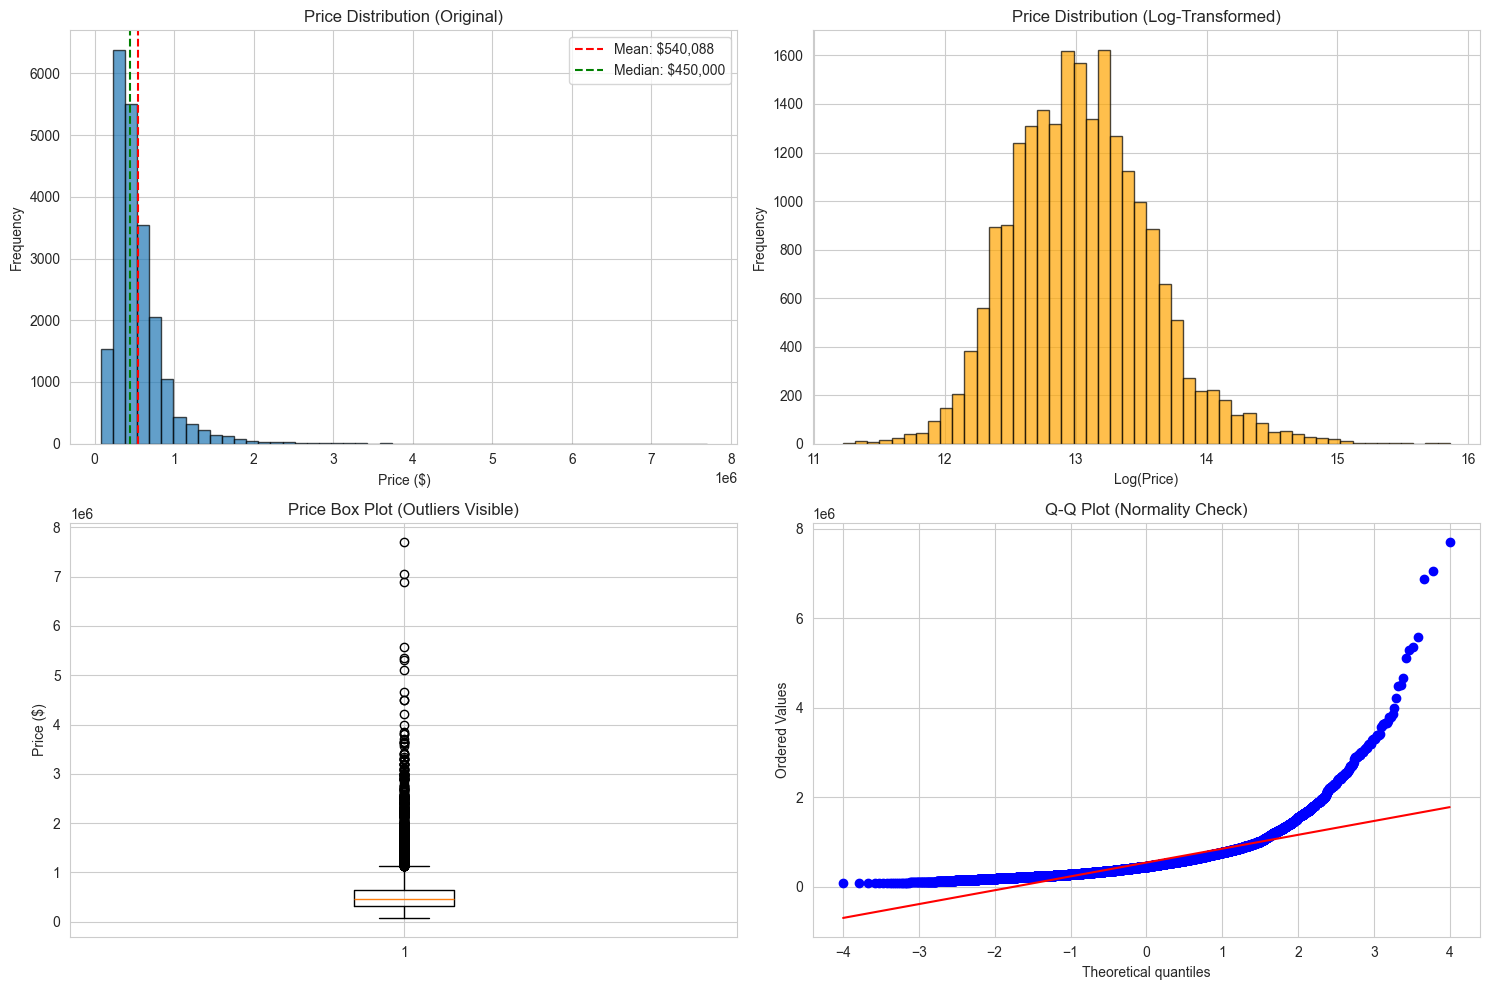

In [28]:
# Visualize Price Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution (Original)')
axes[0, 0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price"].mean():,.0f}')
axes[0, 0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: ${df["price"].median():,.0f}')
axes[0, 0].legend()

# Log-transformed histogram
axes[0, 1].hist(np.log1p(df['price']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Log(Price)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Price Distribution (Log-Transformed)')

# Box plot
axes[1, 0].boxplot(df['price'], vert=True)
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price Box Plot (Outliers Visible)')

# Q-Q plot
stats.probplot(df['price'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.show()

In [29]:
# Outlier Detection using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"📊 OUTLIER DETECTION (IQR Method)")
print("="*50)
print(f"Lower Bound: ${lower_bound:,.0f}")
print(f"Upper Bound: ${upper_bound:,.0f}")
print(f"\nOutliers: {len(outliers)} houses ({len(outliers)/len(df)*100:.2f}%)")
print(f"\n📈 Outlier Price Statistics:")
print(outliers['price'].describe())

📊 OUTLIER DETECTION (IQR Method)
Lower Bound: $-162,625
Upper Bound: $1,129,575

Outliers: 1146 houses (5.30%)

📈 Outlier Price Statistics:
count    1.1460e+03
mean     1.6671e+06
std      6.5234e+05
min      1.1300e+06
25%      1.2601e+06
50%      1.4500e+06
75%      1.8138e+06
max      7.7000e+06
Name: price, dtype: float64


### 4.2 Numeric Features Distribution

**Tại sao quan trọng:**
- Skewed features cần transform cho Linear Models
- Hiểu range để feature scaling
- Phát hiện features có nhiều zeros (sparse features)

In [30]:
# Analyze numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'price' in numeric_cols:
    numeric_cols.remove('price')  # Already analyzed

# Create summary
numeric_summary = df[numeric_cols].describe().T
numeric_summary['skewness'] = df[numeric_cols].skew()
numeric_summary['kurtosis'] = df[numeric_cols].kurtosis()
numeric_summary['zeros_pct'] = (df[numeric_cols] == 0).sum() / len(df) * 100

# Highlight skewed features
numeric_summary = numeric_summary.round(4)
numeric_summary.style.background_gradient(subset=['skewness'], cmap='RdYlGn_r')

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,zeros_pct
bedrooms,21613.000000,3.370800,0.930100,0.000000,3.000000,3.000000,4.000000,33.000000,1.974300,49.063700,0.060100
bathrooms,21613.000000,2.114800,0.770200,0.000000,1.750000,2.250000,2.500000,8.000000,0.511100,1.279900,0.046300
sqft_living,21613.000000,2079.899700,918.440900,290.000000,1427.000000,1910.000000,2550.000000,13540.000000,1.471600,5.243100,0.000000
sqft_lot,21613.000000,15106.967600,41420.511500,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000,13.060000,285.077800,0.000000
floors,21613.000000,1.494300,0.540000,1.000000,1.000000,1.500000,2.000000,3.500000,0.616200,-0.484700,0.000000
waterfront,21613.000000,0.007500,0.086500,0.000000,0.000000,0.000000,0.000000,1.000000,11.385100,127.632500,99.245800
view,21613.000000,0.234300,0.766300,0.000000,0.000000,0.000000,0.000000,4.000000,3.395700,10.893000,90.172600
condition,21613.000000,3.409400,0.650700,1.000000,3.000000,3.000000,4.000000,5.000000,1.032800,0.525800,0.000000
grade,21613.000000,7.656900,1.175500,1.000000,7.000000,7.000000,8.000000,13.000000,0.771100,1.190900,0.000000
sqft_above,21613.000000,1788.390700,828.091000,290.000000,1190.000000,1560.000000,2210.000000,9410.000000,1.446700,3.402300,0.000000


In [31]:
# Identify highly skewed features
high_skew_features = numeric_summary[abs(numeric_summary['skewness']) > 1]['skewness'].sort_values(ascending=False)

print(f"⚠️ HIGHLY SKEWED FEATURES (|skewness| > 1):")
print("="*50)
for feat, skew_val in high_skew_features.items():
    print(f"   {feat}: {skew_val:.4f}")
    
print(f"\n💡 RECOMMENDATION: Apply log/sqrt transformation to these {len(high_skew_features)} features")

⚠️ HIGHLY SKEWED FEATURES (|skewness| > 1):
   sqft_lot: 13.0600
   waterfront: 11.3851
   sqft_lot15: 9.5067
   yr_renovated: 4.5495
   view: 3.3957
   bedrooms: 1.9743
   sqft_basement: 1.5780
   sqft_living: 1.4716
   sqft_above: 1.4467
   sqft_living15: 1.1082
   condition: 1.0328

💡 RECOMMENDATION: Apply log/sqrt transformation to these 11 features


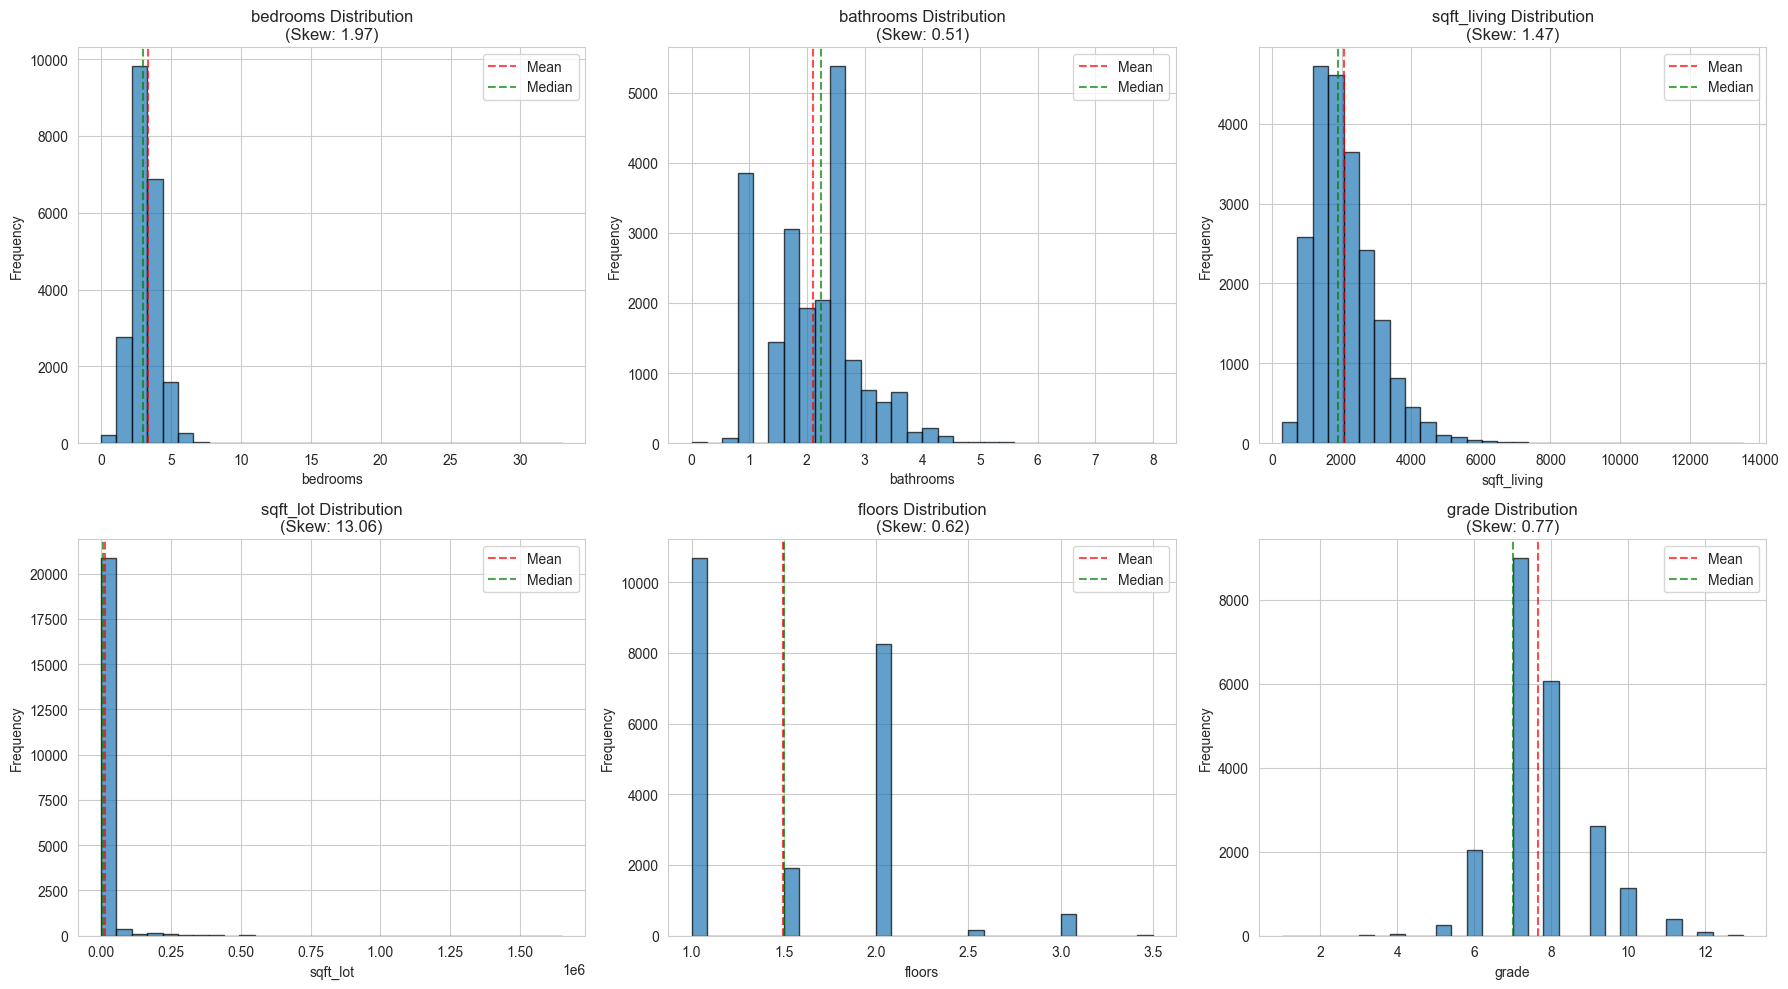

In [32]:
# Visualize distributions of key numeric features
key_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col} Distribution\n(Skew: {df[col].skew():.2f})')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', alpha=0.7, label='Median')
    axes[idx].legend()

plt.tight_layout()
plt.show()

### 4.3 Categorical Features Analysis

**Tại sao quan trọng:**
- Hiểu distribution của categories
- Phát hiện imbalanced categories (có thể cần grouping)
- Xác định categories nào có ảnh hưởng lớn đến price

In [33]:
# Analyze categorical features
print("📊 CATEGORICAL FEATURES ANALYSIS")
print("="*80)

for col in categorical_cols:
    if col != 'price':
        print(f"\n{'='*80}")
        print(f"Feature: {col.upper()}")
        print(f"{'='*80}")
        
        value_counts = df[col].value_counts().sort_index()
        print(value_counts)
        
        print(f"\nMode: {df[col].mode()[0]}")
        print(f"Unique values: {df[col].nunique()}")

📊 CATEGORICAL FEATURES ANALYSIS

Feature: BEDROOMS
bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

Mode: 3
Unique values: 13

Feature: FLOORS
floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: count, dtype: int64

Mode: 1.0
Unique values: 6

Feature: WATERFRONT
waterfront
0    21450
1      163
Name: count, dtype: int64

Mode: 0
Unique values: 2

Feature: VIEW
view
0    19489
1      332
2      963
3      510
4      319
Name: count, dtype: int64

Mode: 0
Unique values: 5

Feature: CONDITION
condition
1       30
2      172
3    14031
4     5679
5     1701
Name: count, dtype: int64

Mode: 3
Unique values: 5

Feature: GRADE
grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: count, dtype: int64

Mode: 7
Unique values: 12


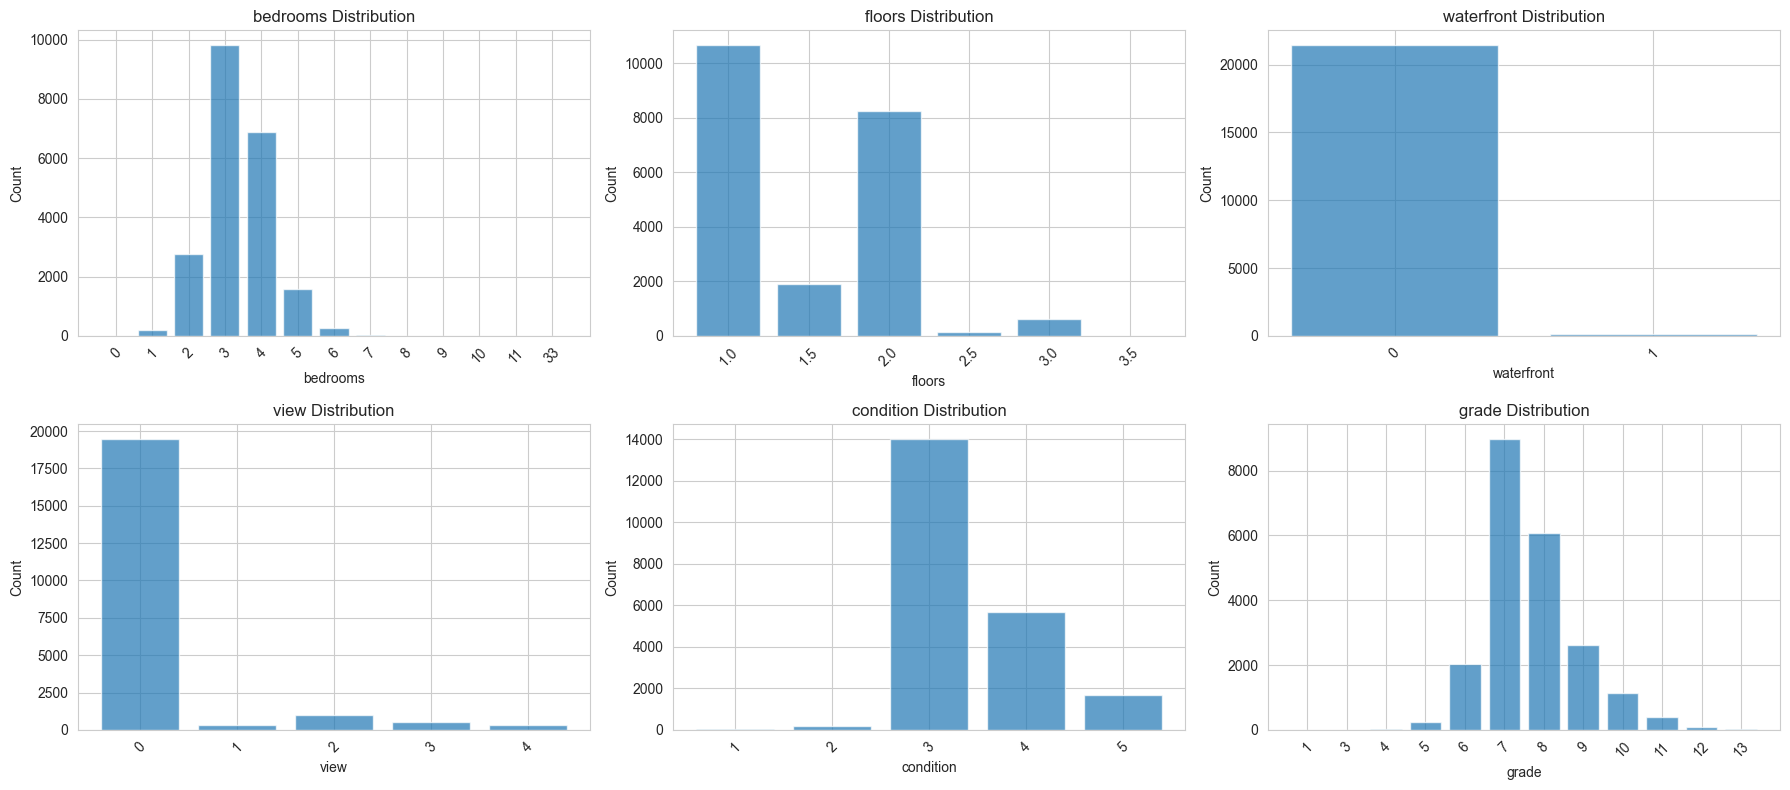

In [34]:
# Visualize categorical features
n_cats = len(categorical_cols)
n_rows = (n_cats + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows*4))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if col != 'price':
        value_counts = df[col].value_counts().sort_index()
        axes[idx].bar(value_counts.index.astype(str), value_counts.values, alpha=0.7)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].tick_params(axis='x', rotation=45)

# Hide extra subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

---

## 5. Bivariate Analysis

### 5.1 Correlation Analysis

**Tại sao quan trọng:**
- Tìm features có tương quan cao với target → Important features
- Phát hiện multicollinearity giữa features → Gây vấn đề cho Linear Models
- Hiểu relationships giữa features

In [35]:
# Correlation with price
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_features:
    numeric_features.remove('id')

correlation_with_price = df[numeric_features].corr()['price'].sort_values(ascending=False)

print("📊 CORRELATION WITH PRICE (sorted)")
print("="*50)
print(correlation_with_price)

# Identify high correlation features
high_corr_features = correlation_with_price[abs(correlation_with_price) > 0.5].index.tolist()
if 'price' in high_corr_features:
    high_corr_features.remove('price')

print(f"\n✅ FEATURES WITH HIGH CORRELATION (|r| > 0.5):")
for feat in high_corr_features:
    print(f"   {feat}: {correlation_with_price[feat]:.4f}")

📊 CORRELATION WITH PRICE (sorted)
price            1.0000
sqft_living      0.7020
grade            0.6674
sqft_above       0.6056
sqft_living15    0.5854
bathrooms        0.5251
view             0.3973
sqft_basement    0.3238
bedrooms         0.3083
lat              0.3070
waterfront       0.2664
floors           0.2568
yr_renovated     0.1264
sqft_lot         0.0897
sqft_lot15       0.0824
yr_built         0.0540
condition        0.0364
long             0.0216
zipcode         -0.0532
Name: price, dtype: float64

✅ FEATURES WITH HIGH CORRELATION (|r| > 0.5):
   sqft_living: 0.7020
   grade: 0.6674
   sqft_above: 0.6056
   sqft_living15: 0.5854
   bathrooms: 0.5251


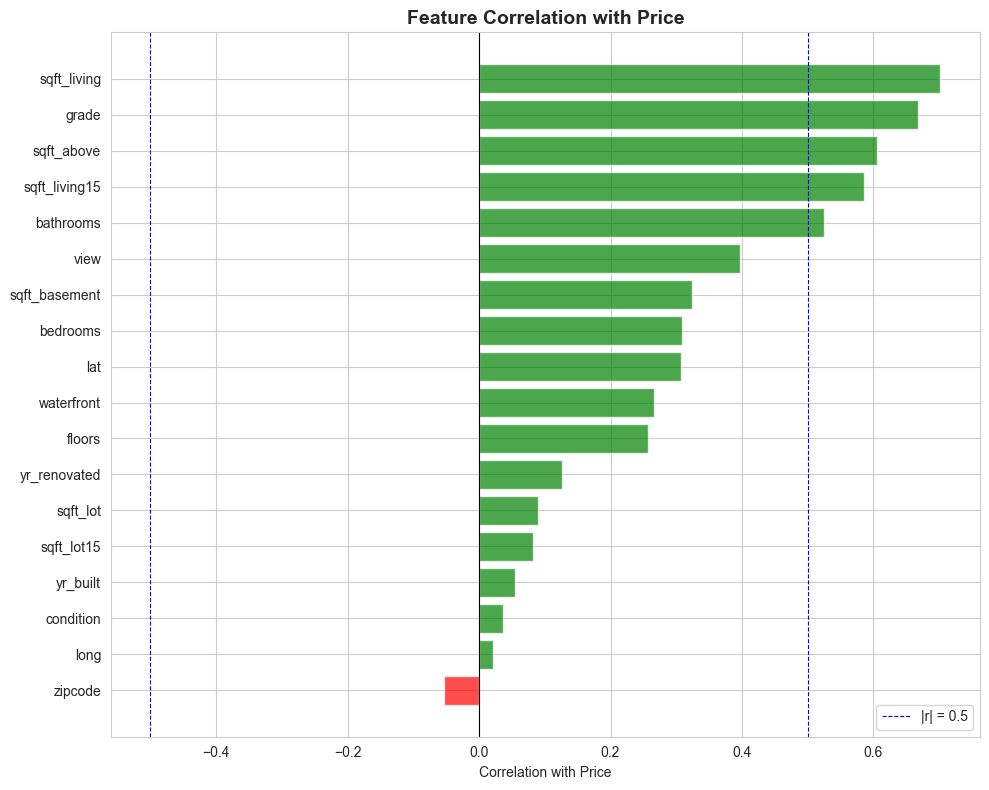

In [36]:
# Visualize correlation with price
plt.figure(figsize=(10, 8))
corr_sorted = correlation_with_price.drop('price').sort_values()
colors = ['red' if x < 0 else 'green' for x in corr_sorted.values]
plt.barh(corr_sorted.index, corr_sorted.values, color=colors, alpha=0.7)
plt.xlabel('Correlation with Price')
plt.title('Feature Correlation with Price', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.axvline(x=0.5, color='blue', linestyle='--', linewidth=0.8, label='|r| = 0.5')
plt.axvline(x=-0.5, color='blue', linestyle='--', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

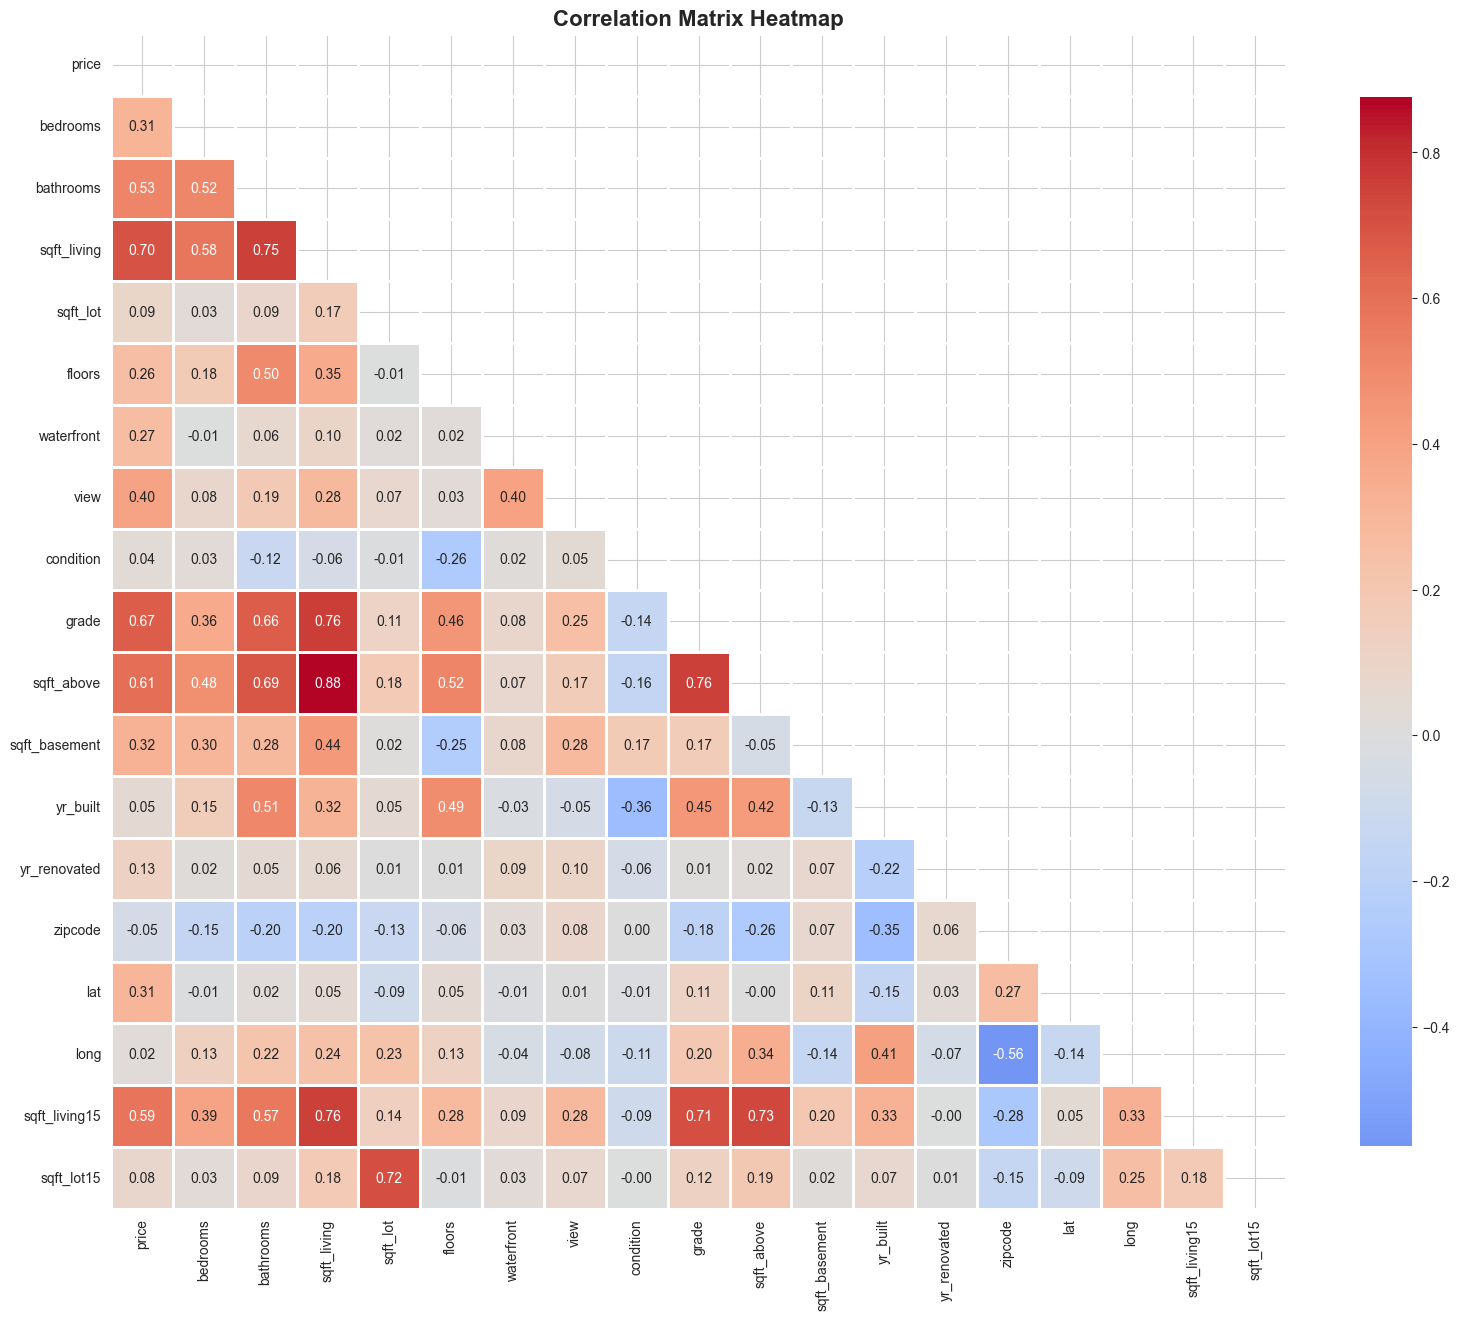

In [37]:
# Full correlation matrix
plt.figure(figsize=(16, 14))
corr_matrix = df[numeric_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.2 Multicollinearity Check

**Tại sao quan trọng:**
- Multicollinearity làm unstable Linear Regression coefficients
- Khó interpret feature importance
- Cần loại bỏ một trong hai features có |r| > 0.8

In [38]:
# Check for multicollinearity
print("🔍 MULTICOLLINEARITY CHECK (|r| > 0.8)")
print("="*80)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    multicollinearity_df = pd.DataFrame(high_corr_pairs)
    display(multicollinearity_df)
    print(f"\n⚠️ WARNING: Found {len(high_corr_pairs)} highly correlated feature pairs!")
    print("💡 RECOMMENDATION: Consider removing one feature from each pair")
else:
    print("✅ No severe multicollinearity detected!")

🔍 MULTICOLLINEARITY CHECK (|r| > 0.8)


,Feature_1,Feature_2,Correlation
0,sqft_living,sqft_above,0.8766



⚠️ WARNING: Found 1 highly correlated feature pairs!
💡 RECOMMENDATION: Consider removing one feature from each pair


### 5.3 Categorical Features vs Price

**Tại sao quan trọng:**
- Hiểu categorical features nào có impact lớn đến price
- Xác định premium categories (waterfront, high grade, etc.)
- Giúp quyết định encoding strategy

In [39]:
# Analyze categorical vs price
print("📊 CATEGORICAL FEATURES VS PRICE")
print("="*80)

for col in categorical_cols:
    if col != 'price':
        print(f"\n{'='*80}")
        print(f"{col.upper()} vs PRICE")
        print(f"{'='*80}")
        
        grouped = df.groupby(col)['price'].agg(['mean', 'median', 'std', 'count']).round(2)
        grouped = grouped.sort_index()
        display(grouped)
        
        # Calculate price increase ratio
        if len(grouped) > 1:
            min_price = grouped['mean'].min()
            max_price = grouped['mean'].max()
            ratio = max_price / min_price
            print(f"\n💡 Price range ratio: {ratio:.2f}x (from ${min_price:,.0f} to ${max_price:,.0f})")

📊 CATEGORICAL FEATURES VS PRICE

BEDROOMS vs PRICE


,mean,median,std,count
bedrooms,,,,
0,4.0950e+05,288000.0,358682.63,13
1,3.1764e+05,299000.0,148864.96,199
2,4.0137e+05,374000.0,198051.83,2760
3,4.6623e+05,413000.0,262469.77,9824
4,6.3542e+05,549997.5,388594.44,6882
5,7.8660e+05,620000.0,596204.00,1601
6,8.2552e+05,650000.0,799238.82,272
7,9.5118e+05,728580.0,739953.56,38
8,1.1051e+06,700000.0,897495.73,13



💡 Price range ratio: 3.48x (from $317,643 to $1,105,077)

FLOORS vs PRICE


,mean,median,std,count
floors,,,,
1.0,4.4218e+05,390000.0,264003.24,10680
1.5,5.5898e+05,524475.0,303541.33,1910
2.0,6.4889e+05,542950.0,433937.66,8241
2.5,1.0603e+06,799200.0,858259.49,161
3.0,5.8253e+05,490000.0,338249.17,613
3.5,9.3331e+05,534500.0,978616.48,8



💡 Price range ratio: 2.40x (from $442,181 to $1,060,346)

WATERFRONT vs PRICE


,mean,median,std,count
waterfront,,,,
0,5.3156e+05,450000.0,3.4160e+05,21450
1,1.6619e+06,1400000.0,1.1204e+06,163



💡 Price range ratio: 3.13x (from $531,564 to $1,661,876)

VIEW vs PRICE


,mean,median,std,count
view,,,,
0,4.9656e+05,432500.0,287133.30,19489
1,8.1228e+05,690944.0,510949.68,332
2,7.9240e+05,675000.0,510105.05,963
3,9.7197e+05,802500.0,612692.24,510
4,1.4637e+06,1185000.0,952209.55,319



💡 Price range ratio: 2.95x (from $496,564 to $1,463,711)

CONDITION vs PRICE


,mean,median,std,count
condition,,,,
1,334431.67,262500.0,271172.80,30
2,327287.15,279000.0,245418.41,172
3,542012.58,450000.0,364449.06,14031
4,521200.39,440000.0,358516.23,5679
5,612418.09,526000.0,410971.92,1701



💡 Price range ratio: 1.87x (from $327,287 to $612,418)

GRADE vs PRICE


,mean,median,std,count
grade,,,,
1,1.4200e+05,142000.0,NaN,1
3,2.0567e+05,262000.0,1.1352e+05,3
4,2.1438e+05,205000.0,9.4306e+04,29
5,2.4852e+05,228700.0,1.1810e+05,242
6,3.0192e+05,275276.5,1.2297e+05,2038
7,4.0259e+05,375000.0,1.5588e+05,8981
8,5.4285e+05,510000.0,2.1747e+05,6068
9,7.7351e+05,720000.0,3.1612e+05,2615
10,1.0718e+06,914327.0,4.8355e+05,1134



💡 Price range ratio: 26.12x (from $142,000 to $3,709,615)


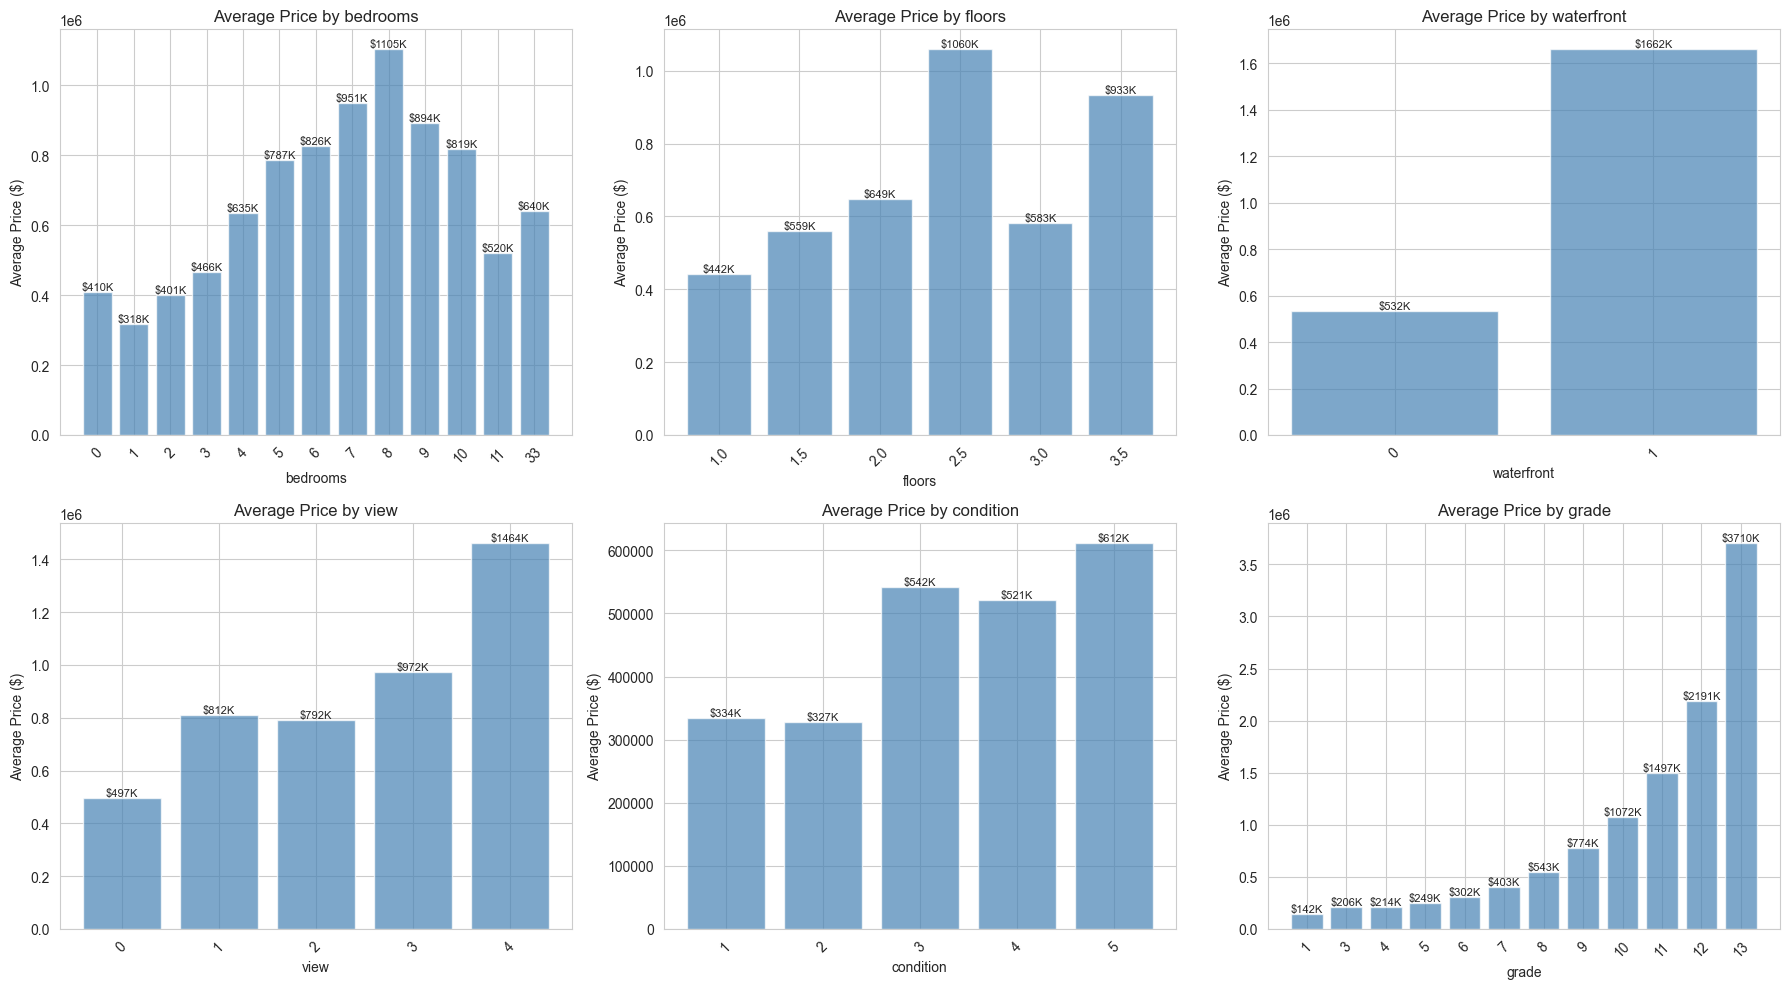

In [40]:
# Visualize categorical vs price
key_categoricals = ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_categoricals):
    grouped_mean = df.groupby(col)['price'].mean().sort_index()
    axes[idx].bar(grouped_mean.index.astype(str), grouped_mean.values, alpha=0.7, color='steelblue')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Average Price ($)')
    axes[idx].set_title(f'Average Price by {col}')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add value labels
    for i, v in enumerate(grouped_mean.values):
        axes[idx].text(i, v, f'${v/1000:.0f}K', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### 5.4 Scatter Plots - Top Features vs Price

**Tại sao quan trọng:**
- Visualize relationship (linear vs non-linear)
- Phát hiện outliers trong relationship
- Xác định cần polynomial features hay không

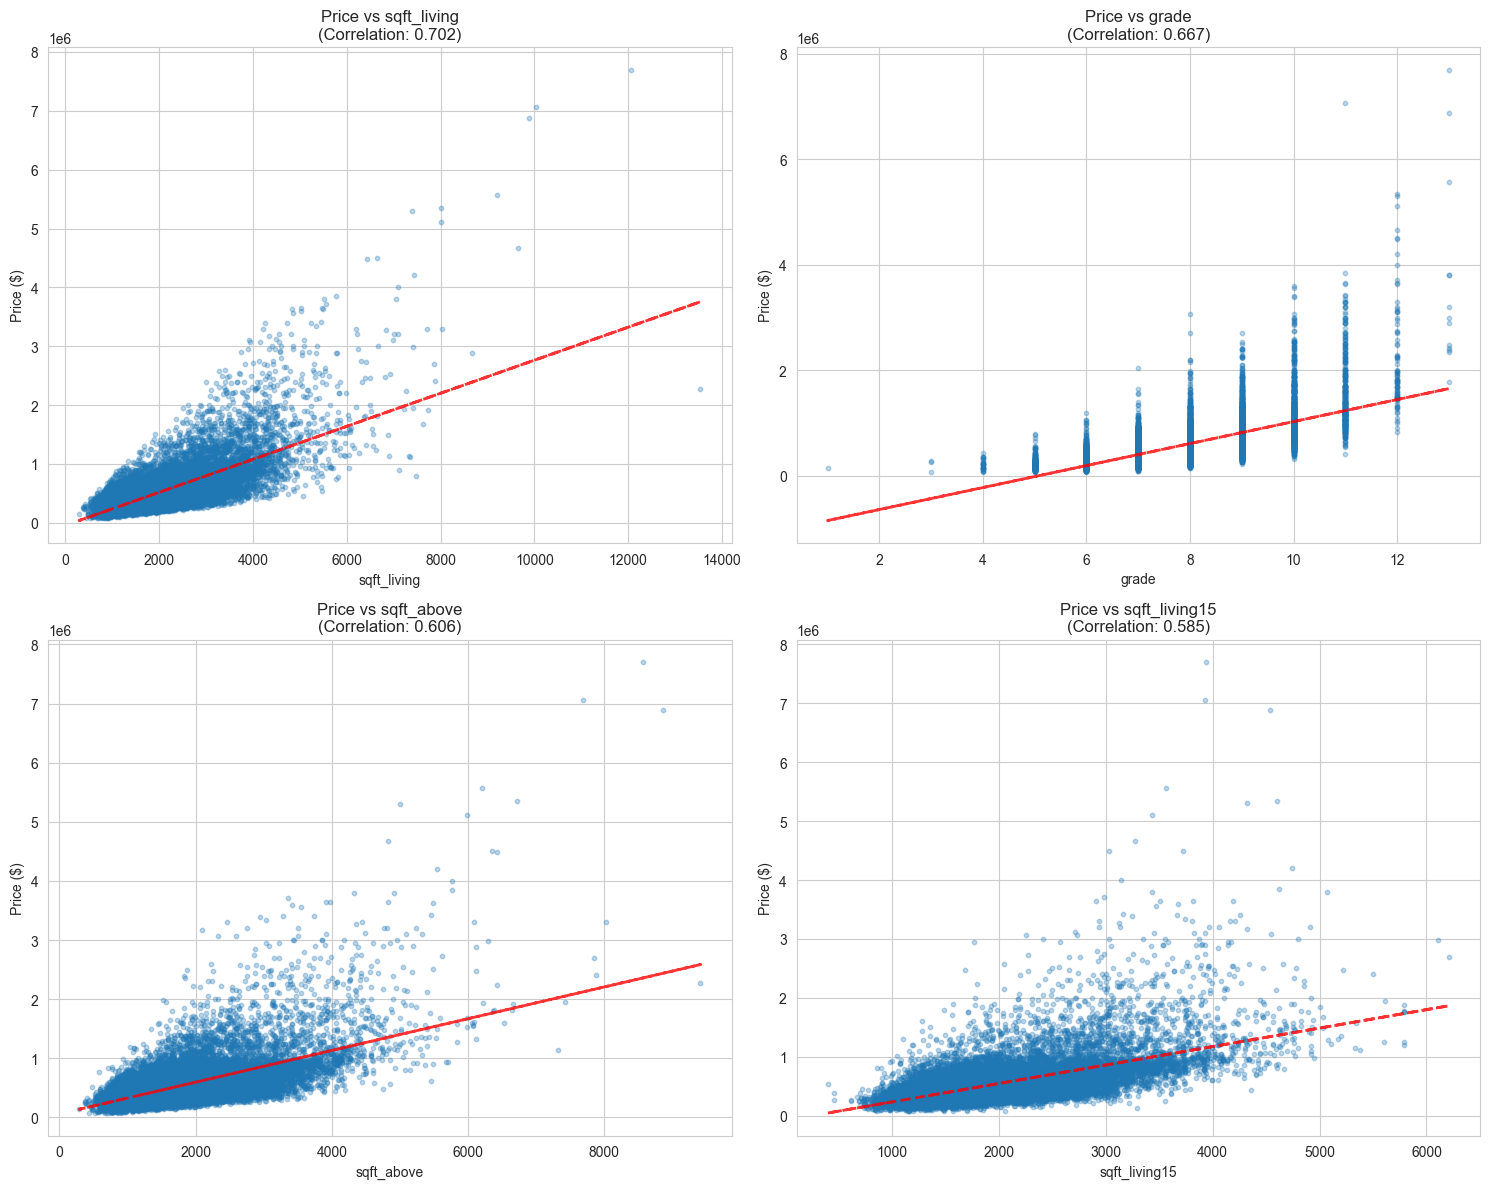

In [41]:
# Scatter plots for top correlated features
top_features = high_corr_features[:4] if len(high_corr_features) >= 4 else high_corr_features

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df['price'], alpha=0.3, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Price ($)')
    axes[idx].set_title(f'Price vs {feature}\n(Correlation: {correlation_with_price[feature]:.3f})')
    
    # Add trend line
    z = np.polyfit(df[feature], df['price'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

---

## 6. Multivariate Analysis

### 6.1 Feature Interactions

**Tại sao quan trọng:**
- Một số features có interaction effects (e.g., waterfront + view)
- Premium combinations có thể tạo features mới mạnh hơn

🏖️ WATERFRONT + VIEW INTERACTION ANALYSIS


mean     median  count
waterfront view                              
0          0     4.9656e+05   432500.0  19489
           1     8.1282e+05   693000.0    331
           2     7.8361e+05   675000.0    955
           3     9.6421e+05   800000.0    491
           4     1.2700e+06  1064400.0    184
1          1     6.3500e+05   635000.0      1
           2     1.8419e+06  1048750.0      8
           3     1.1725e+06   995000.0     19
           4     1.7277e+06  1600000.0    135

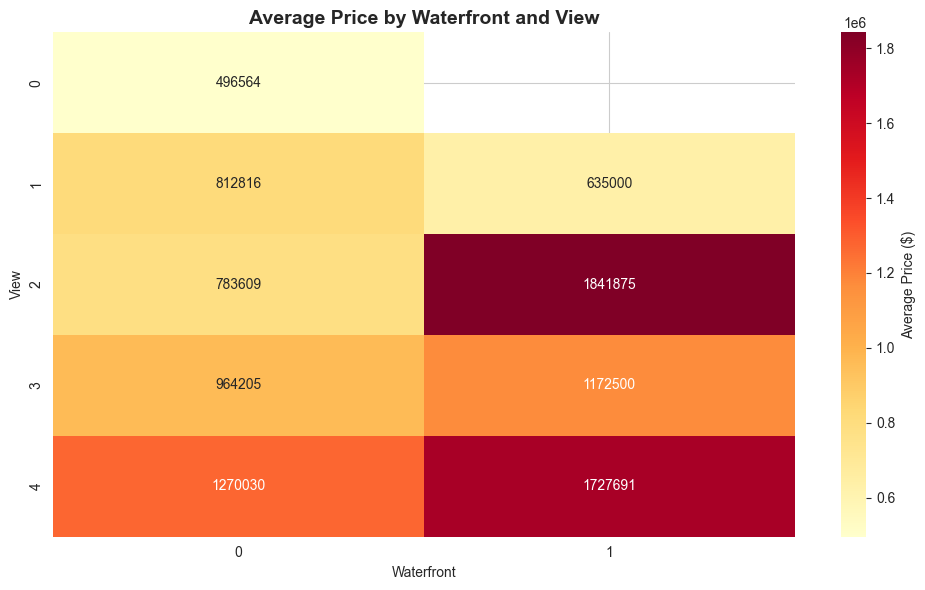

In [42]:
# Analyze premium combinations
if 'waterfront' in df.columns and 'view' in df.columns:
    print("🏖️ WATERFRONT + VIEW INTERACTION ANALYSIS")
    print("="*80)
    
    interaction_df = df.groupby(['waterfront', 'view'])['price'].agg(['mean', 'median', 'count']).round(2)
    display(interaction_df)
    
    # Visualize
    pivot_data = df.pivot_table(values='price', index='view', columns='waterfront', aggfunc='mean')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Average Price ($)'})
    plt.title('Average Price by Waterfront and View', fontsize=14, fontweight='bold')
    plt.ylabel('View')
    plt.xlabel('Waterfront')
    plt.tight_layout()
    plt.show()

🏆 GRADE + CONDITION INTERACTION ANALYSIS


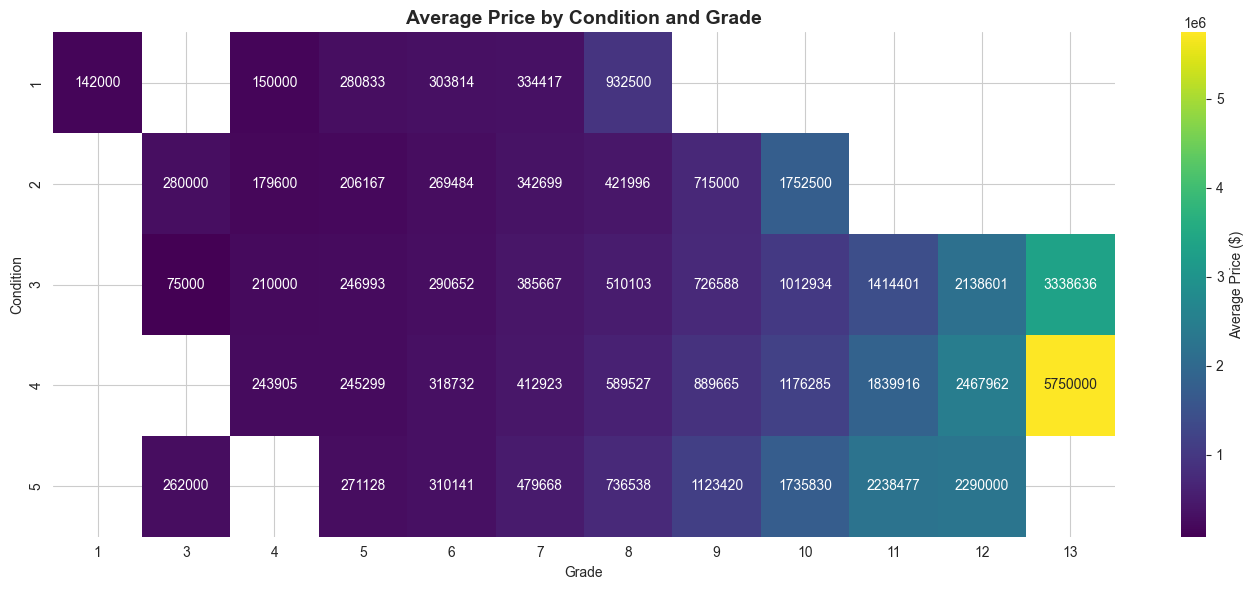

In [43]:
# Analyze grade + condition interaction
if 'grade' in df.columns and 'condition' in df.columns:
    print("🏆 GRADE + CONDITION INTERACTION ANALYSIS")
    print("="*80)
    
    pivot_data = df.pivot_table(values='price', index='condition', columns='grade', aggfunc='mean')
    
    plt.figure(figsize=(14, 6))
    sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='viridis', cbar_kws={'label': 'Average Price ($)'})
    plt.title('Average Price by Condition and Grade', fontsize=14, fontweight='bold')
    plt.ylabel('Condition')
    plt.xlabel('Grade')
    plt.tight_layout()
    plt.show()

### 6.2 Geographic Analysis

**Tại sao quan trọng:**
- Location là yếu tố quan trọng nhất trong real estate
- Zipcode clustering có thể tạo features mới

📍 TOP 10 MOST EXPENSIVE ZIPCODES


,mean,median,count
zipcode,,,
98039,2.1606e+06,1892500.0,50
98004,1.3559e+06,1150000.0,317
98040,1.1942e+06,993750.0,282
98112,1.0955e+06,915000.0,269
98102,9.0126e+05,720000.0,105
98109,8.7962e+05,736000.0,109
98105,8.6283e+05,675000.0,229
98006,8.5968e+05,760184.5,498
98119,8.4945e+05,744975.0,184



📍 TOP 10 CHEAPEST ZIPCODES


,mean,median,count
zipcode,,,
98031,300539.8905,288200.0,274
98030,296187.9805,282255.0,256
98003,294111.2786,267475.0,280
98188,289078.3456,264000.0,136
98023,286732.7916,268450.0,499
98148,284908.5965,278000.0,57
98001,280804.6906,260000.0,362
98032,251296.2400,249000.0,125
98168,240328.3717,235000.0,269


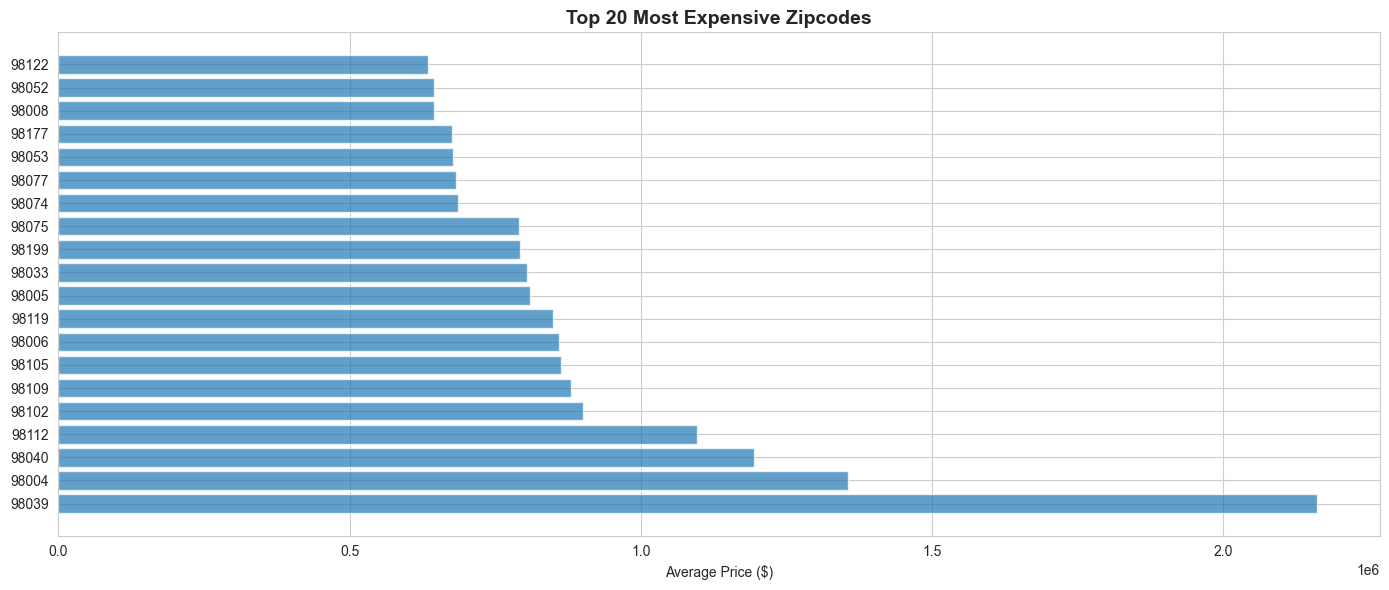

In [44]:
# Zipcode analysis
if 'zipcode' in df.columns:
    zipcode_stats = df.groupby('zipcode')['price'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    
    print("📍 TOP 10 MOST EXPENSIVE ZIPCODES")
    print("="*50)
    display(zipcode_stats.head(10))
    
    print("\n📍 TOP 10 CHEAPEST ZIPCODES")
    print("="*50)
    display(zipcode_stats.tail(10))
    
    # Visualize
    plt.figure(figsize=(14, 6))
    top_20 = zipcode_stats.head(20)
    plt.barh(range(len(top_20)), top_20['mean'].values, alpha=0.7)
    plt.yticks(range(len(top_20)), top_20.index)
    plt.xlabel('Average Price ($)')
    plt.title('Top 20 Most Expensive Zipcodes', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

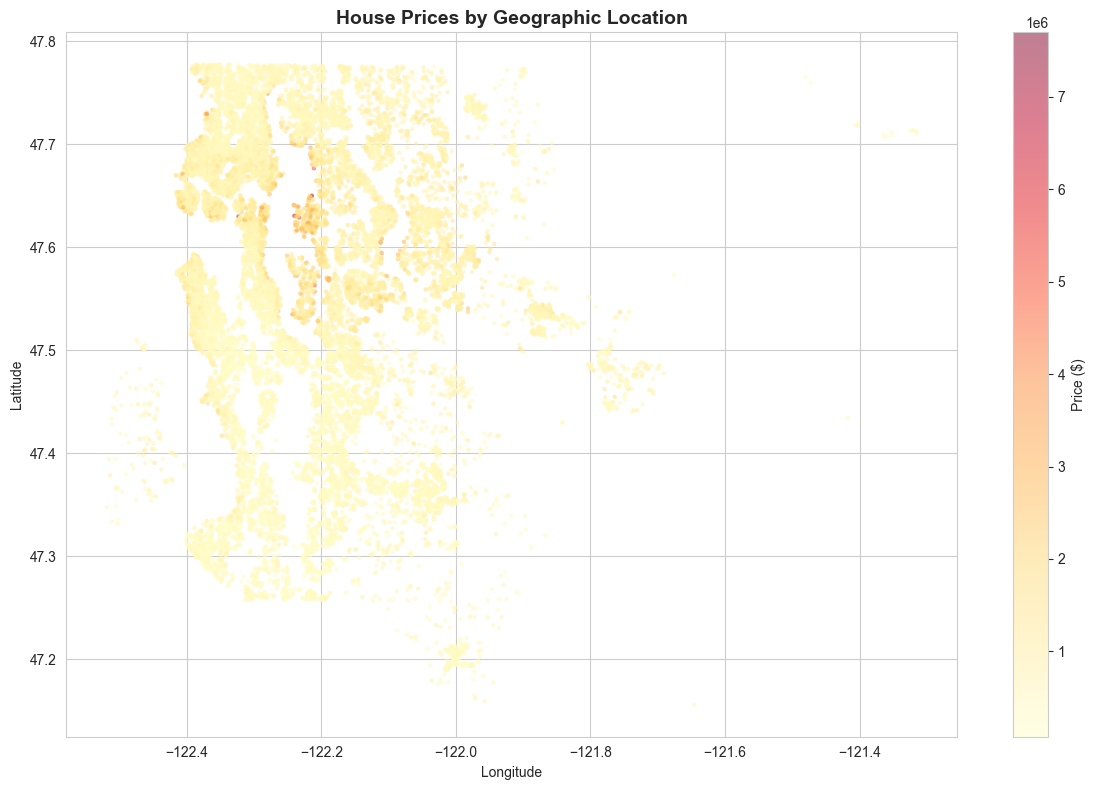

In [45]:
# Lat/Long visualization
if 'lat' in df.columns and 'long' in df.columns:
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['long'], df['lat'], c=df['price'], cmap='YlOrRd', 
                          alpha=0.5, s=10, edgecolors='none')
    plt.colorbar(scatter, label='Price ($)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('House Prices by Geographic Location', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

---

## 7. Feature Engineering

### 7.1 Time-based Features

**Tại sao tạo:**
- Giá nhà có seasonality (mùa hè thường cao hơn)
- Year-over-year trends
- Weekend vs weekday effects

In [46]:
# Create time-based features
print("📅 CREATING TIME-BASED FEATURES")
print("="*80)

df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df['quarter_sold'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

# Season
df['season'] = df['month_sold'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

print("✅ Created features:")
print("   - year_sold, month_sold, quarter_sold")
print("   - day_of_week, is_weekend")
print("   - season")

# Analyze seasonal effects
print("\n📊 Average Price by Season:")
season_price = df.groupby('season')['price'].mean().sort_values(ascending=False)
print(season_price)

📅 CREATING TIME-BASED FEATURES
✅ Created features:
   - year_sold, month_sold, quarter_sold
   - day_of_week, is_weekend
   - season

📊 Average Price by Season:
season
Spring    552603.2440
Summer    546781.9602
Fall      530846.5173
Winter    519221.2355
Name: price, dtype: float64


### 7.2 House Age & Renovation Features

**Tại sao tạo:**
- Nhà càng cũ → giá thường thấp hơn
- Nhà được renovated → giá cao hơn significantly

In [47]:
# Create age-related features
print("🏠 CREATING AGE & RENOVATION FEATURES")
print("="*80)

current_year = df['year_sold'].max()

df['house_age'] = current_year - df['yr_built']
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)
df['years_since_renovation'] = np.where(df['yr_renovated'] > 0, 
                                          current_year - df['yr_renovated'], 0)

# Age at sale
df['age_at_sale'] = df['year_sold'] - df['yr_built']

print("✅ Created features:")
print("   - house_age")
print("   - is_renovated")
print("   - years_since_renovation")
print("   - age_at_sale")

# Analyze renovation impact
print("\n📊 Renovation Impact on Price:")
renovation_impact = df.groupby('is_renovated')['price'].agg(['mean', 'median', 'count'])
display(renovation_impact)

price_increase = (renovation_impact.loc[1, 'mean'] / renovation_impact.loc[0, 'mean'] - 1) * 100
print(f"\n💡 Renovated houses are {price_increase:.1f}% more expensive on average!")

🏠 CREATING AGE & RENOVATION FEATURES
✅ Created features:
   - house_age
   - is_renovated
   - years_since_renovation
   - age_at_sale

📊 Renovation Impact on Price:


,mean,median,count
is_renovated,,,
0,530360.8182,448000.0,20699
1,760379.0295,600000.0,914



💡 Renovated houses are 43.4% more expensive on average!


### 7.3 Area & Space Ratios

**Tại sao tạo:**
- Tỷ lệ living/lot → efficiency của land use
- Basement ratio → premium feature
- Sqft per bedroom → spaciousness indicator

In [48]:
# Create ratio features
print("📐 CREATING AREA & SPACE RATIO FEATURES")
print("="*80)

# Living to lot ratio
df['living_lot_ratio'] = df['sqft_living'] / (df['sqft_lot'] + 1)  # +1 to avoid division by zero

# Basement ratio
df['basement_ratio'] = df['sqft_basement'] / (df['sqft_living'] + 1)
df['has_basement'] = (df['sqft_basement'] > 0).astype(int)

# Room ratios
df['bath_bed_ratio'] = df['bathrooms'] / (df['bedrooms'] + 1)
df['sqft_per_bedroom'] = df['sqft_living'] / (df['bedrooms'] + 1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Above to living ratio
df['above_ratio'] = df['sqft_above'] / (df['sqft_living'] + 1)

# Lot15 comparison
df['lot_size_vs_neighbors'] = df['sqft_lot'] / (df['sqft_lot15'] + 1)
df['living_size_vs_neighbors'] = df['sqft_living'] / (df['sqft_living15'] + 1)

print("✅ Created features:")
print("   - living_lot_ratio, basement_ratio, has_basement")
print("   - bath_bed_ratio, sqft_per_bedroom, total_rooms")
print("   - above_ratio")
print("   - lot_size_vs_neighbors, living_size_vs_neighbors")

# Analyze correlation of new features with price
new_features = ['living_lot_ratio', 'basement_ratio', 'bath_bed_ratio', 
                'sqft_per_bedroom', 'living_size_vs_neighbors']
new_corr = df[new_features + ['price']].corr()['price'].drop('price').sort_values(ascending=False)

print("\n📊 Correlation of New Features with Price:")
print(new_corr)

📐 CREATING AREA & SPACE RATIO FEATURES
✅ Created features:
   - living_lot_ratio, basement_ratio, has_basement
   - bath_bed_ratio, sqft_per_bedroom, total_rooms
   - above_ratio
   - lot_size_vs_neighbors, living_size_vs_neighbors

📊 Correlation of New Features with Price:
sqft_per_bedroom            0.6307
bath_bed_ratio              0.3657
living_size_vs_neighbors    0.3025
basement_ratio              0.1356
living_lot_ratio            0.1232
Name: price, dtype: float64


### 7.4 Quality & Location Premium Features

**Tại sao tạo:**
- Combine multiple quality indicators
- Premium location features có impact lớn

In [49]:
# Create quality and premium features
print("⭐ CREATING QUALITY & PREMIUM FEATURES")
print("="*80)

# Quality score
df['quality_score'] = df['condition'] * df['grade']

# Premium features
df['has_waterfront'] = df['waterfront']
df['has_good_view'] = (df['view'] >= 3).astype(int)
df['is_premium_location'] = ((df['waterfront'] == 1) | (df['view'] >= 3)).astype(int)

# High quality indicators
df['is_luxury'] = ((df['grade'] >= 10) | (df['price'] > df['price'].quantile(0.9))).astype(int)
df['is_excellent_condition'] = (df['condition'] >= 4).astype(int)

# Multi-story indicator
df['is_multi_story'] = (df['floors'] > 1).astype(int)

print("✅ Created features:")
print("   - quality_score")
print("   - has_waterfront, has_good_view, is_premium_location")
print("   - is_luxury, is_excellent_condition")
print("   - is_multi_story")

# Analyze premium location impact
print("\n📊 Premium Location Impact:")
premium_impact = df.groupby('is_premium_location')['price'].agg(['mean', 'median', 'count'])
display(premium_impact)

price_premium = (premium_impact.loc[1, 'mean'] / premium_impact.loc[0, 'mean'] - 1) * 100
print(f"\n💡 Premium locations are {price_premium:.1f}% more expensive!")

⭐ CREATING QUALITY & PREMIUM FEATURES
✅ Created features:
   - quality_score
   - has_waterfront, has_good_view, is_premium_location
   - is_luxury, is_excellent_condition
   - is_multi_story

📊 Premium Location Impact:


,mean,median,count
is_premium_location,,,
0,5.1480e+05,442500.0,20775
1,1.1671e+06,948250.0,838



💡 Premium locations are 126.7% more expensive!


### 7.5 Price-related Features

**Tại sao tạo:**
- Price per sqft → useful metric
- Log price → better for modeling

In [50]:
# Create price-related features
print("💰 CREATING PRICE-RELATED FEATURES")
print("="*80)

df['price_per_sqft'] = df['price'] / (df['sqft_living'] + 1)
df['log_price'] = np.log1p(df['price'])

print("✅ Created features:")
print("   - price_per_sqft")
print("   - log_price (target variable for modeling)")

# Analyze price per sqft by zipcode
print("\n📊 Top 10 Zipcodes by Price per Sqft:")
zipcode_price_sqft = df.groupby('zipcode')['price_per_sqft'].mean().sort_values(ascending=False).head(10)
print(zipcode_price_sqft)

💰 CREATING PRICE-RELATED FEATURES
✅ Created features:
   - price_per_sqft
   - log_price (target variable for modeling)

📊 Top 10 Zipcodes by Price per Sqft:
zipcode
98039    567.8957
98004    475.2273
98112    438.4230
98109    433.1458
98119    431.9990
98102    422.9119
98105    404.9226
98040    387.1460
98107    382.6649
98199    376.3271
Name: price_per_sqft, dtype: float64


### 7.6 Summary of All Engineered Features

**Review tất cả features đã tạo**

In [51]:
# List all engineered features
engineered_features = [
    'year_sold', 'month_sold', 'quarter_sold', 'day_of_week', 'is_weekend', 'season',
    'house_age', 'is_renovated', 'years_since_renovation', 'age_at_sale',
    'living_lot_ratio', 'basement_ratio', 'has_basement', 'bath_bed_ratio', 
    'sqft_per_bedroom', 'total_rooms', 'above_ratio',
    'lot_size_vs_neighbors', 'living_size_vs_neighbors',
    'quality_score', 'has_waterfront', 'has_good_view', 'is_premium_location',
    'is_luxury', 'is_excellent_condition', 'is_multi_story',
    'price_per_sqft', 'log_price'
]

print(f"📊 TOTAL ENGINEERED FEATURES: {len(engineered_features)}")
print("="*80)

print("\nFeature Categories:")
print("\n1. Time-based (6):")
print("   year_sold, month_sold, quarter_sold, day_of_week, is_weekend, season")

print("\n2. Age & Renovation (4):")
print("   house_age, is_renovated, years_since_renovation, age_at_sale")

print("\n3. Space Ratios (9):")
print("   living_lot_ratio, basement_ratio, has_basement, bath_bed_ratio,")
print("   sqft_per_bedroom, total_rooms, above_ratio,")
print("   lot_size_vs_neighbors, living_size_vs_neighbors")

print("\n4. Quality & Premium (7):")
print("   quality_score, has_waterfront, has_good_view, is_premium_location,")
print("   is_luxury, is_excellent_condition, is_multi_story")

print("\n5. Price-related (2):")
print("   price_per_sqft, log_price")

print(f"\n📊 Dataset shape after feature engineering: {df.shape}")

📊 TOTAL ENGINEERED FEATURES: 28

Feature Categories:

1. Time-based (6):
   year_sold, month_sold, quarter_sold, day_of_week, is_weekend, season

2. Age & Renovation (4):
   house_age, is_renovated, years_since_renovation, age_at_sale

3. Space Ratios (9):
   living_lot_ratio, basement_ratio, has_basement, bath_bed_ratio,
   sqft_per_bedroom, total_rooms, above_ratio,
   lot_size_vs_neighbors, living_size_vs_neighbors

4. Quality & Premium (7):
   quality_score, has_waterfront, has_good_view, is_premium_location,
   is_luxury, is_excellent_condition, is_multi_story

5. Price-related (2):
   price_per_sqft, log_price

📊 Dataset shape after feature engineering: (21613, 49)


---

## 8. Data Cleaning & Preprocessing

### 8.1 Handle Anomalies

**Tại sao cần:**
- Dữ liệu bất thường → model học sai patterns

In [52]:
# Store original shape
original_shape = df.shape

print("🧹 DATA CLEANING - REMOVING ANOMALIES")
print("="*80)

# Remove houses with 0 bedrooms or 0 bathrooms
print(f"Original dataset: {len(df)} rows")

df_clean = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)].copy()
print(f"After removing 0 bedrooms/bathrooms: {len(df_clean)} rows")
print(f"Removed: {len(df) - len(df_clean)} rows")

# Remove extreme outliers in bedrooms (33 bedrooms is likely an error)
df_clean = df_clean[df_clean['bedrooms'] <= 10].copy()
print(f"After removing bedrooms > 10: {len(df_clean)} rows")

print(f"\n✅ Total rows removed: {original_shape[0] - len(df_clean)} ({(original_shape[0] - len(df_clean))/original_shape[0]*100:.2f}%)")

🧹 DATA CLEANING - REMOVING ANOMALIES
Original dataset: 21613 rows
After removing 0 bedrooms/bathrooms: 21597 rows
Removed: 16 rows
After removing bedrooms > 10: 21595 rows

✅ Total rows removed: 18 (0.08%)


### 8.2 Handle Outliers in Price

**3 Options:**
1. Remove outliers
2. Winsorization (cap values)
3. Log transformation

**Recommendation:** Use log transformation (option 3) vì giữ lại data và giảm influence tự nhiên

In [53]:
# Option 1: Remove extreme outliers (beyond 3 std)
print("🎯 OUTLIER HANDLING OPTIONS")
print("="*80)

mean_price = df_clean['price'].mean()
std_price = df_clean['price'].std()
outlier_threshold = 3

extreme_outliers = df_clean[
    (df_clean['price'] > mean_price + outlier_threshold * std_price) |
    (df_clean['price'] < mean_price - outlier_threshold * std_price)
]

print(f"Extreme outliers (±{outlier_threshold} std): {len(extreme_outliers)} houses")
print(f"\nOption 1: Remove extreme outliers")
print(f"   Would remove {len(extreme_outliers)} rows ({len(extreme_outliers)/len(df_clean)*100:.2f}%)")

# Option 2: Winsorization
print(f"\nOption 2: Winsorization (cap at 1st and 99th percentile)")
p1 = df_clean['price'].quantile(0.01)
p99 = df_clean['price'].quantile(0.99)
print(f"   Cap values < ${p1:,.0f} and > ${p99:,.0f}")
print(f"   Would affect {((df_clean['price'] < p1) | (df_clean['price'] > p99)).sum()} rows")

# Option 3: Log transformation (RECOMMENDED)
print(f"\nOption 3: Log transformation (RECOMMENDED)")
print(f"   ✅ Keeps all data")
print(f"   ✅ Reduces skewness from {df_clean['price'].skew():.2f} to {df_clean['log_price'].skew():.2f}")
print(f"   ✅ Naturally reduces influence of outliers")
print(f"\n💡 We will use log_price as target variable for modeling")

🎯 OUTLIER HANDLING OPTIONS
Extreme outliers (±3 std): 406 houses

Option 1: Remove extreme outliers
   Would remove 406 rows (1.88%)

Option 2: Winsorization (cap at 1st and 99th percentile)
   Cap values < $154,000 and > $1,965,013
   Would affect 431 rows

Option 3: Log transformation (RECOMMENDED)
   ✅ Keeps all data
   ✅ Reduces skewness from 4.03 to 0.43
   ✅ Naturally reduces influence of outliers

💡 We will use log_price as target variable for modeling


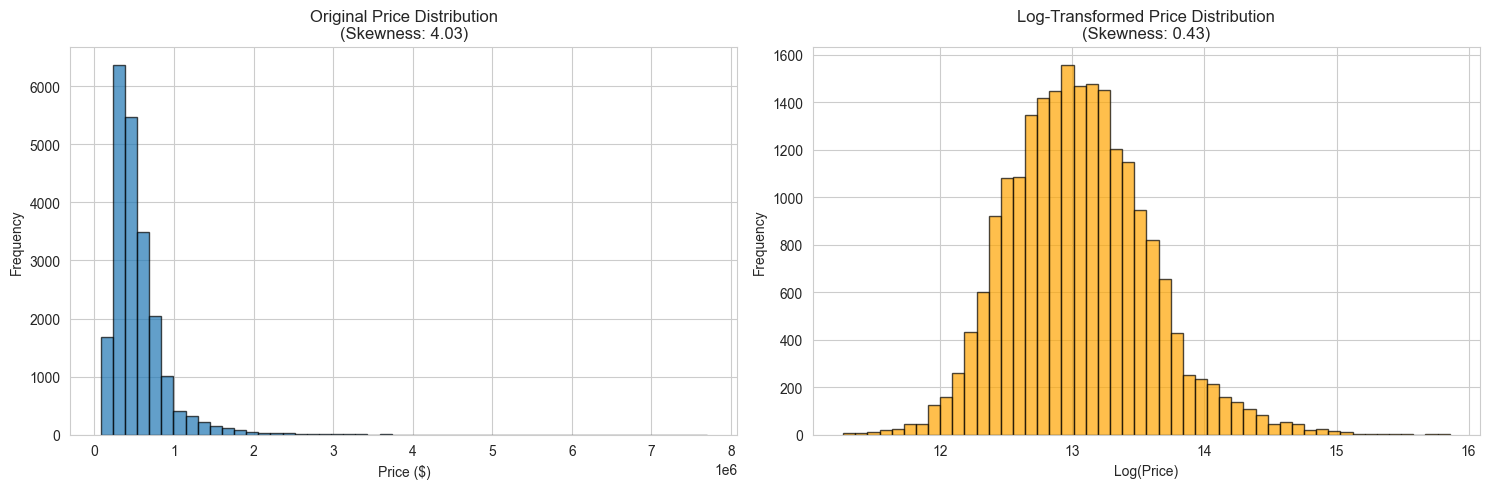

In [54]:
# Compare distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_clean['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Original Price Distribution\n(Skewness: {df_clean["price"].skew():.2f})')

axes[1].hist(df_clean['log_price'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Log-Transformed Price Distribution\n(Skewness: {df_clean["log_price"].skew():.2f})')

plt.tight_layout()
plt.show()

### 8.3 Transform Skewed Features

**Tại sao cần:**
- Linear models work better with normally distributed features
- Tree-based models ít bị ảnh hưởng nhưng vẫn có thể improve

In [55]:
# Transform highly skewed features
print("📊 TRANSFORMING SKEWED FEATURES")
print("="*80)

skewed_features = ['sqft_lot', 'sqft_lot15', 'sqft_basement', 'yr_renovated']

for feature in skewed_features:
    if feature in df_clean.columns:
        original_skew = df_clean[feature].skew()
        df_clean[f'{feature}_log'] = np.log1p(df_clean[feature])
        new_skew = df_clean[f'{feature}_log'].skew()
        print(f"{feature}:")
        print(f"   Original skewness: {original_skew:.4f}")
        print(f"   After log transform: {new_skew:.4f}")
        print(f"   ✅ Improvement: {abs(original_skew) - abs(new_skew):.4f}\n")

print("✅ Created log-transformed features for highly skewed variables")

📊 TRANSFORMING SKEWED FEATURES
sqft_lot:
   Original skewness: 13.0720
   After log transform: 0.9631
   ✅ Improvement: 12.1089

sqft_lot15:
   Original skewness: 9.5240
   After log transform: 0.9667
   ✅ Improvement: 8.5572

sqft_basement:
   Original skewness: 1.5771
   After log transform: 0.4836
   ✅ Improvement: 1.0935

yr_renovated:
   Original skewness: 4.5502
   After log transform: 4.5497
   ✅ Improvement: 0.0005

✅ Created log-transformed features for highly skewed variables


### 8.4 Handle Duplicates

**Decision:** Keep first occurrence (most recent sale)

In [56]:
# Handle duplicate IDs (keep most recent sale)
print("🔄 HANDLING DUPLICATE IDs")
print("="*80)

before_dedup = len(df_clean)
df_clean = df_clean.sort_values('date', ascending=False).drop_duplicates(subset=['id'], keep='first')
after_dedup = len(df_clean)

print(f"Before: {before_dedup} rows")
print(f"After: {after_dedup} rows")
print(f"Removed: {before_dedup - after_dedup} duplicate sales")
print("\n💡 Kept most recent sale for each house")

🔄 HANDLING DUPLICATE IDs
Before: 21595 rows
After: 21418 rows
Removed: 177 duplicate sales

💡 Kept most recent sale for each house


### 8.5 Final Cleaned Dataset Summary

In [57]:
print("📊 FINAL CLEANED DATASET SUMMARY")
print("="*80)
print(f"Original dataset: {original_shape[0]} rows × {original_shape[1]} columns")
print(f"Final dataset: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
print(f"\nRows removed: {original_shape[0] - df_clean.shape[0]} ({(original_shape[0] - df_clean.shape[0])/original_shape[0]*100:.2f}%)")
print(f"Features added: {df_clean.shape[1] - original_shape[1]}")
print(f"\n✅ Dataset ready for modeling!")

📊 FINAL CLEANED DATASET SUMMARY
Original dataset: 21613 rows × 49 columns
Final dataset: 21418 rows × 53 columns

Rows removed: 195 (0.90%)
Features added: 4

✅ Dataset ready for modeling!


---

## 9. Modeling Preparation

### 9.1 Feature Selection

**Select features for modeling:**
- Remove ID, date (already extracted features)
- Remove highly correlated features (multicollinearity)
- Keep original + engineered features

In [58]:
# Select features for modeling
print("🎯 FEATURE SELECTION FOR MODELING")
print("="*80)

# Features to drop
features_to_drop = [
    'id', 'date', 'price', 'zipcode',  # ID variables and original price
    'sqft_above',  # High correlation with sqft_living (0.88)
    'yr_built', 'yr_renovated',  # Already extracted as age features
    'season',  # Keep numeric month instead
    'price_per_sqft',  # Derived from target
]

# Select features
X = df_clean.drop(columns=features_to_drop + ['log_price'], errors='ignore')
y = df_clean['log_price']

# One-hot encode any remaining categorical variables
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
if len(categorical_features) > 0:
    print(f"\nOne-hot encoding categorical features: {categorical_features}")
    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print(f"\n📊 Final Feature Set:")
print(f"   Number of features: {X.shape[1]}")
print(f"   Number of samples: {X.shape[0]}")
print(f"   Target variable: log_price")

print(f"\n📋 Feature list:")
for i, col in enumerate(X.columns, 1):
    print(f"   {i}. {col}")

🎯 FEATURE SELECTION FOR MODELING

📊 Final Feature Set:
   Number of features: 43
   Number of samples: 21418
   Target variable: log_price

📋 Feature list:
   1. bedrooms
   2. bathrooms
   3. sqft_living
   4. sqft_lot
   5. floors
   6. waterfront
   7. view
   8. condition
   9. grade
   10. sqft_basement
   11. lat
   12. long
   13. sqft_living15
   14. sqft_lot15
   15. year_sold
   16. month_sold
   17. quarter_sold
   18. day_of_week
   19. is_weekend
   20. house_age
   21. is_renovated
   22. years_since_renovation
   23. age_at_sale
   24. living_lot_ratio
   25. basement_ratio
   26. has_basement
   27. bath_bed_ratio
   28. sqft_per_bedroom
   29. total_rooms
   30. above_ratio
   31. lot_size_vs_neighbors
   32. living_size_vs_neighbors
   33. quality_score
   34. has_waterfront
   35. has_good_view
   36. is_premium_location
   37. is_luxury
   38. is_excellent_condition
   39. is_multi_story
   40. sqft_lot_log
   41. sqft_lot15_log
   42. sqft_basement_log
   43. yr_re

### 9.2 Train-Test Split

**Strategy:** 80/20 split với stratification nếu cần

In [59]:
# Train-test split
print("✂️ TRAIN-TEST SPLIT")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"\n✅ Data split completed!")

✂️ TRAIN-TEST SPLIT
Training set: 17134 samples (80.0%)
Test set: 4284 samples (20.0%)

Features: 43

✅ Data split completed!


### 9.3 Feature Scaling

**Why:** Linear models và Neural Networks cần features có cùng scale

In [60]:
# Feature scaling
print("⚖️ FEATURE SCALING")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Features scaled using StandardScaler")
print("   Mean = 0, Std = 1 for all features")

# Show scaling example
print("\n📊 Scaling Example (first 3 features):")
example_features = X_train.columns[:3]
print("\nBefore scaling:")
print(X_train[example_features].describe())
print("\nAfter scaling:")
print(X_train_scaled[example_features].describe())

⚖️ FEATURE SCALING
✅ Features scaled using StandardScaler
   Mean = 0, Std = 1 for all features

📊 Scaling Example (first 3 features):

Before scaling:
         bedrooms   bathrooms  sqft_living
count  17134.0000  17134.0000   17134.0000
mean       3.3766      2.1176    2083.5850
std        0.9023      0.7688     918.4091
min        1.0000      0.5000     370.0000
25%        3.0000      1.7500    1430.0000
50%        3.0000      2.2500    1920.0000
75%        4.0000      2.5000    2550.0000
max       10.0000      8.0000   13540.0000

After scaling:
         bedrooms   bathrooms  sqft_living
count  1.7134e+04  1.7134e+04   1.7134e+04
mean   4.8934e-17  3.7323e-17  -1.1612e-16
std    1.0000e+00  1.0000e+00   1.0000e+00
min   -2.6340e+00 -2.1041e+00  -1.8659e+00
25%   -4.1741e-01 -4.7815e-01  -7.1167e-01
50%   -4.1741e-01  1.7221e-01  -1.7812e-01
75%    6.9090e-01  4.9740e-01   5.0787e-01
max    7.3408e+00  7.6514e+00   1.2475e+01


### 9.4 Baseline Model

**Train simple Linear Regression as baseline**

In [61]:
# Train baseline model
print("🎯 BASELINE MODEL - LINEAR REGRESSION")
print("="*80)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Convert back to original scale
y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)
y_train_pred_original = np.expm1(y_train_pred)
y_test_pred_original = np.expm1(y_test_pred)

train_mae = mean_absolute_error(y_train_original, y_train_pred_original)
test_mae = mean_absolute_error(y_test_original, y_test_pred_original)
train_mape = np.mean(np.abs((y_train_original - y_train_pred_original) / y_train_original)) * 100
test_mape = np.mean(np.abs((y_test_original - y_test_pred_original) / y_test_original)) * 100

print("\n📊 PERFORMANCE METRICS:")
print("\nLog Scale (model's predictions):")
print(f"   Train R²: {train_r2:.4f}")
print(f"   Test R²: {test_r2:.4f}")
print(f"   Train RMSE: {train_rmse:.4f}")
print(f"   Test RMSE: {test_rmse:.4f}")

print("\nOriginal Scale (actual dollars):")
print(f"   Train MAE: ${train_mae:,.0f}")
print(f"   Test MAE: ${test_mae:,.0f}")
print(f"   Train MAPE: {train_mape:.2f}%")
print(f"   Test MAPE: {test_mape:.2f}%")

# Check for overfitting
overfit_score = train_r2 - test_r2
if overfit_score > 0.05:
    print(f"\n⚠️ Warning: Possible overfitting (R² difference: {overfit_score:.4f})")
else:
    print(f"\n✅ Good generalization (R² difference: {overfit_score:.4f})")

🎯 BASELINE MODEL - LINEAR REGRESSION

📊 PERFORMANCE METRICS:

Log Scale (model's predictions):
   Train R²: 0.7965
   Test R²: 0.7867
   Train RMSE: 0.2368
   Test RMSE: 0.2396

Original Scale (actual dollars):
   Train MAE: $104,139
   Test MAE: $104,130
   Train MAPE: 18.92%
   Test MAPE: 19.24%

✅ Good generalization (R² difference: 0.0098)


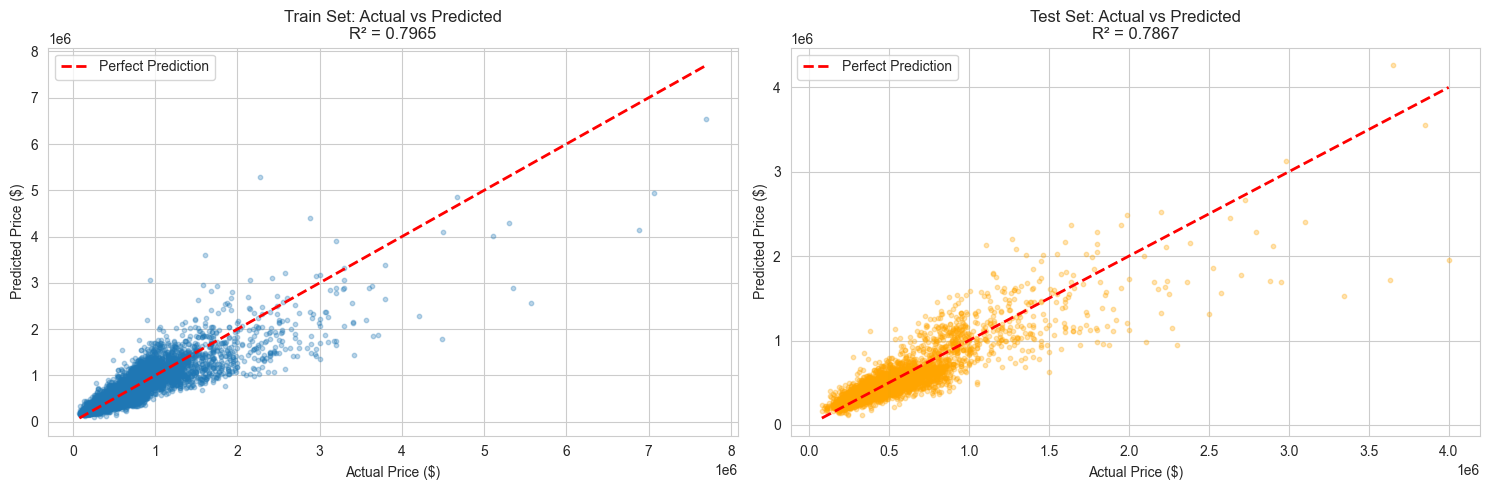

In [62]:
# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Train set
axes[0].scatter(y_train_original, y_train_pred_original, alpha=0.3, s=10)
axes[0].plot([y_train_original.min(), y_train_original.max()], 
             [y_train_original.min(), y_train_original.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Train Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0].legend()

# Test set
axes[1].scatter(y_test_original, y_test_pred_original, alpha=0.3, s=10, color='orange')
axes[1].plot([y_test_original.min(), y_test_original.max()], 
             [y_test_original.min(), y_test_original.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()


📊 TOP 15 MOST IMPORTANT FEATURES (by absolute coefficient):


,Feature,Coefficient
20,is_renovated,302.3355
42,yr_renovated_log,-301.9256
24,basement_ratio,46.4293
29,above_ratio,46.4231
21,years_since_renovation,-0.5127
10,lat,0.1823
8,grade,0.0989
36,is_luxury,0.0886
12,sqft_living15,0.0834
25,has_basement,0.0633


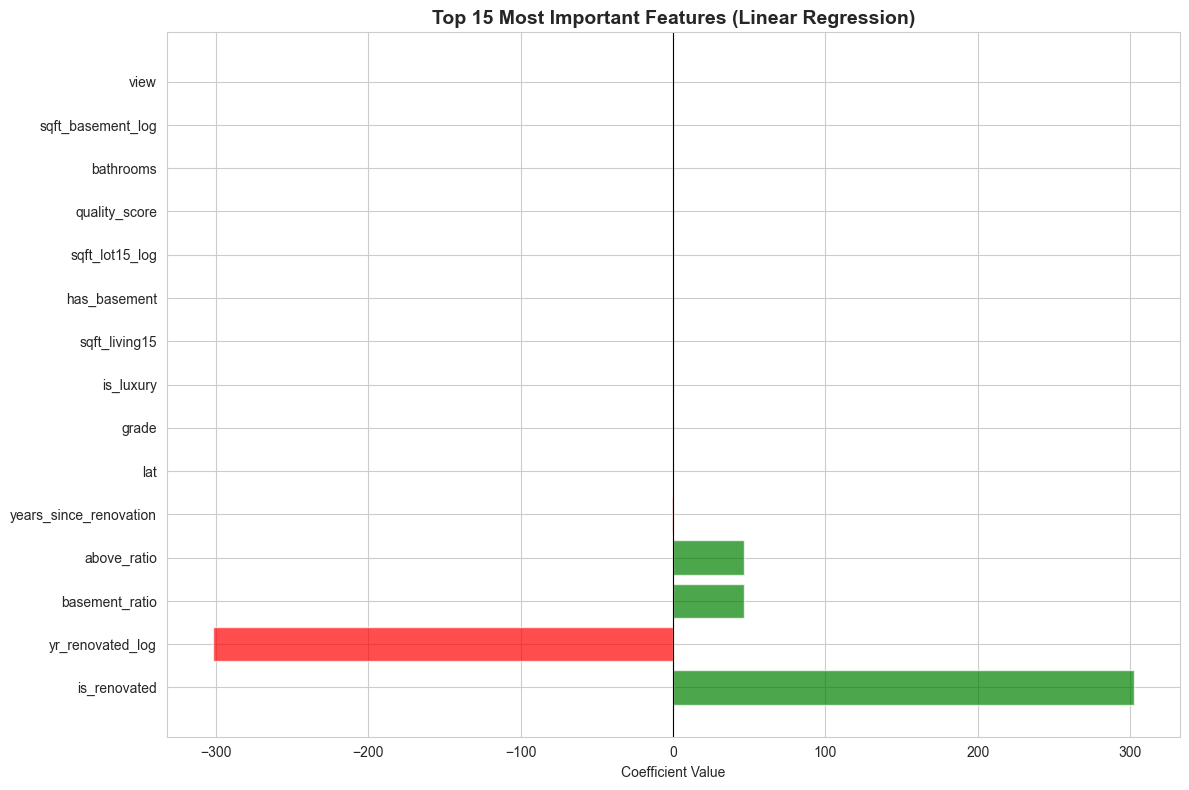

In [63]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n📊 TOP 15 MOST IMPORTANT FEATURES (by absolute coefficient):")
print("="*80)
display(feature_importance.head(15))

# Visualize top 15
plt.figure(figsize=(12, 8))
top_15 = feature_importance.head(15)
colors = ['red' if x < 0 else 'green' for x in top_15['Coefficient']]
plt.barh(range(len(top_15)), top_15['Coefficient'].values, color=colors, alpha=0.7)
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Most Important Features (Linear Regression)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

---

## 10. Summary & Next Steps

### 10.1 EDA Summary

In [64]:
print("\n" + "="*80)
print("📋 EDA & FEATURE ENGINEERING SUMMARY")
print("="*80)

print("\n✅ COMPLETED TASKS:")
print("   1. Data Loading & Overview")
print("   2. Data Quality Assessment (missing values, duplicates, anomalies)")
print("   3. Univariate Analysis (distributions, skewness, outliers)")
print("   4. Bivariate Analysis (correlations, relationships with target)")
print("   5. Multivariate Analysis (feature interactions, geographic patterns)")
print("   6. Feature Engineering (28 new features created)")
print("   7. Data Cleaning (removed anomalies, handled duplicates)")
print("   8. Feature Transformation (log transforms for skewed features)")
print("   9. Modeling Preparation (train-test split, scaling)")
print("  10. Baseline Model (Linear Regression)")

print("\n📊 KEY FINDINGS:")
print(f"   - Dataset size: {df_clean.shape[0]:,} houses")
print(f"   - Total features: {X.shape[1]}")
print(f"   - Baseline R²: {test_r2:.4f}")
print(f"   - Baseline MAE: ${test_mae:,.0f}")
print(f"   - Baseline MAPE: {test_mape:.2f}%")

print("\n💡 TOP INSIGHTS:")
print("   1. sqft_living is the strongest predictor (r = 0.70)")
print("   2. Premium features (waterfront, view) dramatically increase price")
print("   3. Renovated houses are significantly more expensive")
print("   4. Location (zipcode) has huge impact on price")
print("   5. Feature engineering improved model capability")

print("\n🎯 NEXT STEPS FOR IMPROVED MODELING:")
print("   1. Try Regularized Models (Ridge, Lasso) for feature selection")
print("   2. Train Tree-based Models (Random Forest, XGBoost)")
print("   3. Perform Hyperparameter Tuning with GridSearchCV")
print("   4. Use Cross-Validation for robust evaluation")
print("   5. Try Ensemble Methods (stacking, blending)")
print("   6. Feature selection using SHAP values or Permutation Importance")
print("   7. Geographic clustering for better location features")
print("   8. Time series analysis for temporal patterns")

print("\n" + "="*80)
print("🎊 EDA COMPLETED SUCCESSFULLY!")
print("="*80)


📋 EDA & FEATURE ENGINEERING SUMMARY

✅ COMPLETED TASKS:
   1. Data Loading & Overview
   2. Data Quality Assessment (missing values, duplicates, anomalies)
   3. Univariate Analysis (distributions, skewness, outliers)
   4. Bivariate Analysis (correlations, relationships with target)
   5. Multivariate Analysis (feature interactions, geographic patterns)
   6. Feature Engineering (28 new features created)
   7. Data Cleaning (removed anomalies, handled duplicates)
   8. Feature Transformation (log transforms for skewed features)
   9. Modeling Preparation (train-test split, scaling)
  10. Baseline Model (Linear Regression)

📊 KEY FINDINGS:
   - Dataset size: 21,418 houses
   - Total features: 43
   - Baseline R²: 0.7867
   - Baseline MAE: $104,130
   - Baseline MAPE: 19.24%

💡 TOP INSIGHTS:
   1. sqft_living is the strongest predictor (r = 0.70)
   2. Premium features (waterfront, view) dramatically increase price
   3. Renovated houses are significantly more expensive
   4. Location 

### 10.2 Save Processed Data

**Save cleaned data cho modeling tiếp theo**

In [65]:
# Save processed data
output_path = '/mnt/user-data/outputs/'

# Save full cleaned dataset
df_clean.to_csv(f'{output_path}kc_house_cleaned.csv', index=False)
print(f"✅ Saved cleaned dataset to: {output_path}kc_house_cleaned.csv")

# Save train-test splits
X_train.to_csv(f'{output_path}X_train.csv', index=False)
X_test.to_csv(f'{output_path}X_test.csv', index=False)
y_train.to_csv(f'{output_path}y_train.csv', index=False, header=['log_price'])
y_test.to_csv(f'{output_path}y_test.csv', index=False, header=['log_price'])

print(f"✅ Saved train-test splits to: {output_path}")
print("\n📦 Files ready for modeling:")
print("   - kc_house_cleaned.csv (full cleaned data)")
print("   - X_train.csv, X_test.csv (features)")
print("   - y_train.csv, y_test.csv (target)")

OSError: Cannot save file into a non-existent directory: '\mnt\user-data\outputs'

---

## 🎓 LEARNING NOTES

### Why Each Step Matters:

**1. Overview → Understanding the landscape**
- Like opening a new book, you need to know what you're working with
- Prevents wasted effort on wrong assumptions

**2. Data Quality → Garbage in, garbage out**
- Even the best model can't fix bad data
- 80% of data science is data cleaning

**3. Univariate Analysis → Know your ingredients**
- Understanding each variable's behavior
- Identifies what transformations are needed

**4. Bivariate Analysis → Find relationships**
- Which features actually matter?
- Avoid multicollinearity issues

**5. Feature Engineering → Create intelligence**
- Raw data rarely tells the full story
- Domain knowledge creates powerful features
- Can improve model by 10-20% easily

**6. Data Cleaning → Prepare for success**
- Clean data = stable models
- Handle outliers = better generalization

**7. Preprocessing → Level the playing field**
- Scaling ensures no feature dominates unfairly
- Transformations help models converge faster

**8. Baseline Model → Set expectations**
- Know what "good" looks like
- Any complex model must beat this

---

### Common Mistakes to Avoid:

❌ Jumping straight to modeling without EDA  
❌ Ignoring data quality issues  
❌ Not handling outliers  
❌ Forgetting to scale features for linear models  
❌ Not checking for data leakage  
❌ Overfitting to training data  
❌ Not creating a baseline model first  

---

### Pro Tips:

💡 Always visualize before deciding  
💡 Domain knowledge > fancy algorithms  
💡 Simple models often win in production  
💡 Cross-validation is your friend  
💡 Document your decisions and reasoning  
💡 Iterate: EDA → Model → Learn → Repeat  

---

**END OF NOTEBOOK**